# Learing the relationship among the different bearing temperature 

In [1]:
from __future__ import print_function

In [2]:
## Import
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
% matplotlib inline

### Load data

In [3]:
df_405 = pd.read_csv("data/bearing_temp/231-6057_2016-04-05-ZX_WD_2.csv",header=None,
                    names=['V1','V2','V3','V4','V5','V6','V7','V8'])
df_406 = pd.read_csv("data/bearing_temp/231-6057_2016-04-06-ZX_WD_2.csv",header=None,
                    names=['V1','V2','V3','V4','V5','V6','V7','V8'])
df_407 = pd.read_csv("data/bearing_temp/231-6057_2016-04-07-ZX_WD_2.csv",header=None,
                    names=['V1','V2','V3','V4','V5','V6','V7','V8'])
df_408 = pd.read_csv("data/bearing_temp/231-6057_2016-04-08-ZX_WD_2.csv",header=None,
                    names=['V1','V2','V3','V4','V5','V6','V7','V8'])

# Del the last two zero column
df_405 = df_405.drop(['V7','V8'],1)
df_406 = df_406.drop(['V7','V8'],1)
df_407 = df_407.drop(['V7','V8'],1)
df_408 = df_408.drop(['V7','V8'],1)

In [4]:
print("----------- data information-------------")
print("***df_405:")
print(df_405.info())
print(df_405.describe())
print("-----------------------------------------")
print("***df_406:")
print(df_406.info())
print(df_406.describe())
print("-----------------------------------------")
print("***df_407:")
print(df_407.info())
print(df_407.describe())
print("----------------------------------------")
print("***df_408:")
print(df_408.info())
print(df_408.describe())
print("------------End-------------------------")

----------- data information-------------
***df_405:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 6 columns):
V1    438 non-null int64
V2    438 non-null int64
V3    438 non-null int64
V4    438 non-null int64
V5    438 non-null int64
V6    438 non-null int64
dtypes: int64(6)
memory usage: 20.6 KB
None
               V1          V2          V3          V4          V5          V6
count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean    25.123288   34.433790   27.732877   24.388128   30.938356   23.561644
std      4.145341    6.892038    1.855012    1.482173    4.887601    4.277512
min     21.000000   28.000000   24.000000   21.000000   24.000000   19.000000
25%     23.000000   29.000000   27.000000   24.000000   26.000000   21.000000
50%     24.000000   32.000000   28.000000   25.000000   34.000000   22.000000
75%     26.000000   37.000000   29.000000   26.000000   36.000000   25.000000
max     39.000000   56.00

In [5]:
df_407.describe()

,V1,V2,V3,V4,V5,V6
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,33.881048,51.224194,34.739516,27.191532,34.073790,30.082661
std,5.650287,12.751058,5.058102,2.733860,4.933176,5.394335
min,19.000000,21.000000,21.000000,20.000000,21.000000,18.000000
25%,31.000000,45.000000,34.000000,26.000000,32.000000,27.000000
50%,35.000000,51.000000,36.000000,28.000000,34.000000,30.000000
75%,38.000000,59.000000,38.000000,29.000000,38.000000,34.000000
max,43.000000,81.000000,43.000000,33.000000,43.000000,41.000000


In [6]:
df_406.describe()

,V1,V2,V3,V4,V5,V6
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000
mean,30.891682,50.824057,27.792340,23.330341,31.145422,28.831837
std,6.825691,13.519962,3.896947,2.060413,4.280835,5.561294
min,18.000000,23.000000,22.000000,20.000000,24.000000,18.000000
25%,26.000000,43.000000,25.000000,22.000000,28.000000,26.000000
50%,31.000000,54.000000,27.000000,23.000000,31.000000,30.000000
75%,37.000000,62.000000,31.000000,25.000000,34.000000,32.000000
max,43.000000,74.000000,38.000000,29.000000,41.000000,42.000000


In [7]:
def comparing_plot(y_origin,y_predict,train_ratio):
    f,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

    ax1.set_title('Comparing original and predict time series') 
    ax1.plot(y_origin)
    ax2.plot(y_predict)

    plt.figure(figsize=(10,6))
    plt.plot(y_origin-y_predict)
    plt.title("the errors: original subtract predict")
    
    plt.figure(figsize=(10,6))
    plt.plot(y_origin,'ro')
    plt.plot(y_predict)
    
    train_index = np.round(len(y_origin) * train_ratio)
    yo_train = y_origin[1:train_index]
    yp_train = y_predict[1:train_index]
    yo_test = y_origin[(train_index+1)::]
    yp_test = y_predict[(train_index+1)::]
    
    print("normalized mean-squared error: ")
    print(np.sqrt(np.nanmean((y_origin-y_predict)**2))/(max(y_origin)-min(y_predict)))
    print("mean-squared error: ")
    print(np.sqrt(np.nanmean((y_origin-y_predict)**2)))
    
    print("test set normalized mean-squared error and mean-squared error:")
    print(np.sqrt(np.nanmean((yo_test-yp_test)**2))/(max(y_origin)-min(y_origin)))
    #print(np.sqrt(np.nanmean((yo_test-yp_test)**2))/(max(yo_test)-min(yo_test)))
    print(np.sqrt(np.nanmean((yo_test-yp_test)**2)))
    
    print("train set normalized mean-squared error and mean-squared error:")
    print(np.sqrt(np.nanmean((yo_train-yp_train)**2))/(max(y_origin)-min(y_origin)))
    #print(np.sqrt(np.nanmean((yo_train-yp_train)**2))/(max(yo_train)-min(yo_train)))
    print(np.sqrt(np.nanmean((yo_train-yp_train)**2)))


### Prepare data

In [245]:
data = df_407.as_matrix()
#standardize data
#for i in np.arange(0,np.size(data,1)):
#    data[:,i] = (data[:,i] - np.mean(data[:,i])) 
dt = 1
t = np.arange(0,len(data)+1,dt)
dX = np.gradient(data,axis=0) 

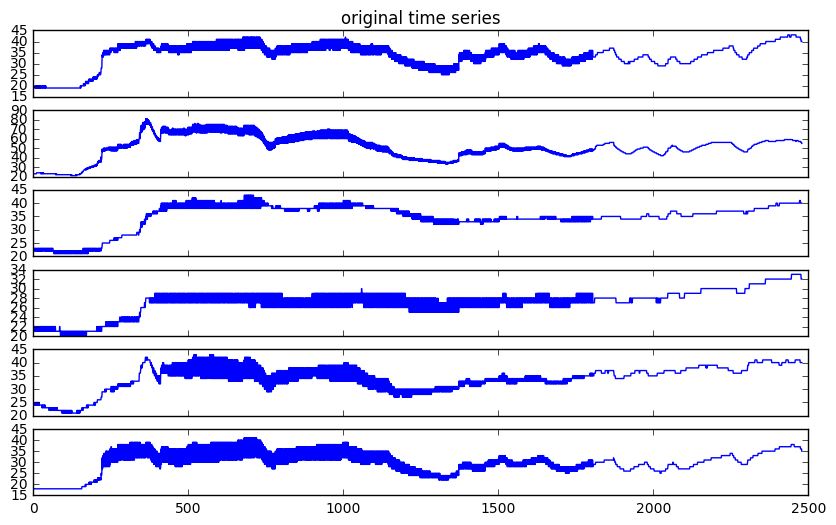

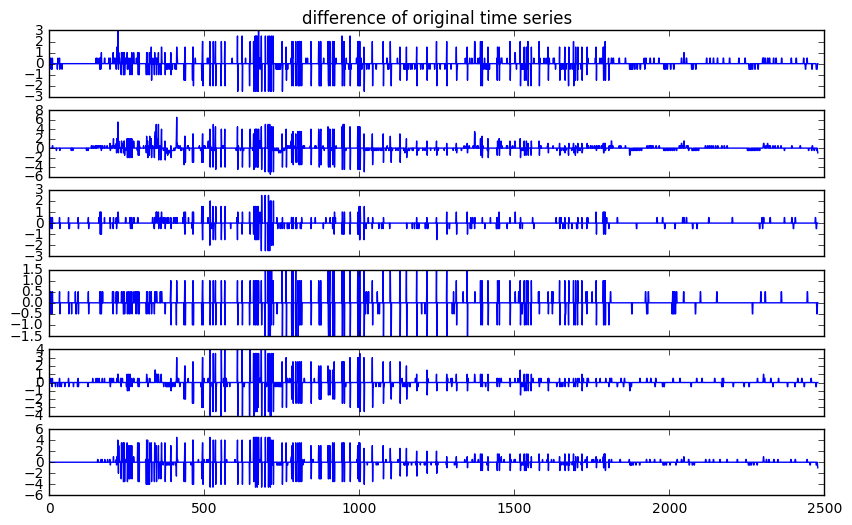

In [246]:
f,axis = plt.subplots(6,1,sharex=True,figsize=(10,6))
for i in np.arange(0,len(axis)):
    axis[i].plot(data[:,i])
axis[0].set_title("original time series")

f,axis = plt.subplots(6,1,sharex=True,figsize=(10,6))
for i in np.arange(0,len(axis)):
    axis[i].plot(dX[:,i])
axis[0].set_title("difference of original time series")

In [ ]:
def result_summary_ffx(results,varnames):
    for result,name in zip(results,varnames):
        front_test,front_train,models = result
        comp,error = front_test
        print("************************* %s *********************"%name)
        for model in models:
            print(str(model))
        plt.plot(comp,error,label=name)
    plt.xlabel(r"Complexity $\Gamma_2$")
    plt.ylabel(r"Error $\Gamma_1$")
    plt.legend()
    plt.tight_layout()

### Symbolic regression with FFX

In [452]:
import ffx

def run_ffx(train_X, train_y, test_X, test_y, varnames):
    models = ffx.run(train_X, train_y, test_X, test_y, varnames)
    base = [model.numBases() for model in models]
    test_error = [model.test_nmse for model in models]
    train_error = [ffx.core.nmse(model.simulate(train_X), train_y, min(train_y), max(train_y)) 
                   for model in models]
    
    return ([base, test_error], [base, train_error], models)

def cal_nrmse_ffx(model,X,y):
    return np.sqrt(np.nanmean((model.simulate(X)-y)**2))/(max(y)-min(y))
def cal_rmse_ffx(model,X,y):
    return np.sqrt(np.nanmean((model.simulate(X)-y)**2))

def run_ffx_main(data,y_i,varnames,train_ratio,cols):
    lag = np.round( train_ratio * len(data) )
    train_X = data[1:(len(data)-lag),cols]
    train_y = data[1:(len(data)-lag):,y_i]
    test_X = data[(len(data)-lag)::,cols]
    test_y = data[(len(data)-lag)::,y_i]
    
    fitted_result = run_ffx(train_X,train_y,test_X,test_y,varnames[cols])
    front_test,front_train,models = fitted_result
    
    comp,_ = front_test
    
    test_nrmse = [ cal_nrmse_ffx(model,test_X,test_y) for model in models ]
    test_rmse = [ cal_rmse_ffx(model,test_X,test_y) for model in models ]
    
    train_nrmse = [ cal_nrmse_ffx(model,train_X,train_y) for model in models ]
    train_rmse = [ cal_rmse_ffx(model,train_X,train_y) for model in models ]
    
    return comp,[test_nrmse,train_nrmse],[test_rmse,train_rmse],models
    

def run_ffx_main2(data,y_i,varnames,cols):
    train_X = data[::2,cols]
    train_y = data[::2,y_i]
    test_X = data[1::2,cols]
    test_y = data[1::2,y_i]
    
    fitted_result = run_ffx(train_X,train_y,test_X,test_y,varnames[cols])
    
    front_test,front_train,models = fitted_result
    
    comp,_ = front_test
    
    test_nrmse = [ cal_nrmse_ffx(model,test_X,test_y) for model in models ]
    test_rmse = [ cal_rmse_ffx(model,test_X,test_y) for model in models ]
    
    train_nrmse = [ cal_nrmse_ffx(model,train_X,train_y) for model in models ]
    train_rmse = [ cal_rmse_ffx(model,train_X,train_y) for model in models ]
    
    return comp,[test_nrmse,train_nrmse],[test_rmse,train_rmse],models


def result_summary_ffx(results,varnames):
    for result,name in zip(results,varnames):
        coms,nrmses,rmses,models = result
        nrmses_test, nrmses_train = nrmses
        rmses_test,rmses_train = rmses
        print("************************* %s *********************"%name)
        for model in models:
            print(str(model))
        print("---------------------------------------------------------------------------------")
        print("complexity         nrmse_test         nrmse_train         rmse_test         rmse_train")
        for com,nrmse_test,nrmse_train,rmse_test,rmse_train in zip(coms,nrmses_test,nrmses_train,rmses_test,rmses_train):
            print("%f         %f         %f         %f         %f"%(com,nrmse_test,nrmse_train,rmse_test,rmse_train))
        print("*********************************************************************")
   
    plt.figure()
    for result,name in zip(results,varnames):
        coms,nrmses,rmses,_ = result
        nrmses_test,_= nrmses
        plt.plot(coms,nrmses_test,label=name)
    plt.xlabel(r"Complexity $\Gamma_2$")
    plt.ylabel(r"Error $\Gamma_1$")
    plt.legend()
    plt.tight_layout()
    
    plt.figure()
    for result,name in zip(results,varnames):
        coms,nrmses,rmses,_ = result
        rmses_test,_= rmses
        plt.plot(coms,rmses_test,label=name)
    plt.xlabel(r"Complexity $\Gamma_2$")
    plt.ylabel(r"Error $\Gamma_1$")
    plt.legend()
    plt.tight_layout()

In [453]:
### Learn expression by ffx
train_ratio = 0.5
varnames = np.array(['V1','V2','V3','V4','V5','V6'])
ffx_results = list()
for i in np.arange(0,6):
    print("-------------------------learn V%d------------"%(i+1))
    cols = list(np.arange(0,6))
    del cols[i]
    fitted_result = run_ffx_main(data,i,varnames,train_ratio = train_ratio,cols = cols)
    ffx_results.insert(i,fitted_result)
    print("--------------------end----------------------------")

-------------------------learn V1------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-

--------------------end----------------------------
-------------------------learn V2------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-

--------------------end----------------------------
-------------------------learn V3------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-

--------------------end----------------------------
-------------------------learn V4------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-

--------------------end----------------------------
-------------------------learn V5------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-

--------------------end----------------------------
-------------------------learn V6------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-

--------------------end----------------------------


************************* V1 *********************
34.0
28.4 + 0.181*V6
-46.7 + 38.6*log10(V6) + 14.0*log10(V2)
-55.6 + 42.4*log10(V6) + 13.3*log10(V2) + 2.91*log10(V3)
---------------------------------------------------------------------------------
complexity         nrmse_test         nrmse_train         rmse_test         rmse_train
0.000000         0.216032         0.303074         3.888569         6.970710
1.000000         0.181830         0.252496         3.272946         5.807405
2.000000         0.083253         0.045243         1.498562         1.040579
3.000000         0.075642         0.036744         1.361558         0.845122
*********************************************************************
************************* V2 *********************
54.0
50.7 / (1.0 - 0.00170*V1)
42.7 / (1.0 - 0.00395*V1 - 0.00250*V4)
7.90 / (1.0 - 0.267*log10(V1) - 0.159*log10(V5) - 0.126*log10(V3))
11.0 / (1.0 - 0.202*log10(V1) - 0.134*log10(V5) - 0.127*log10(V3) - 0.0333*log10(V5) * log10(V1)

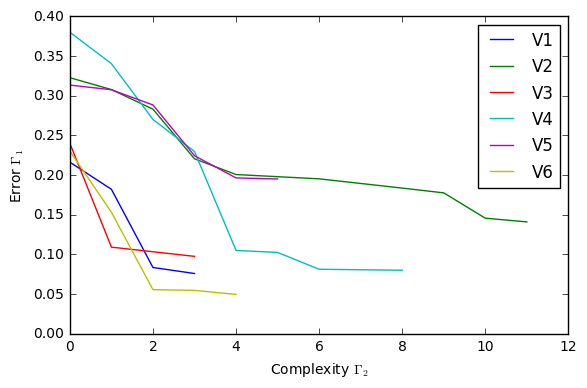

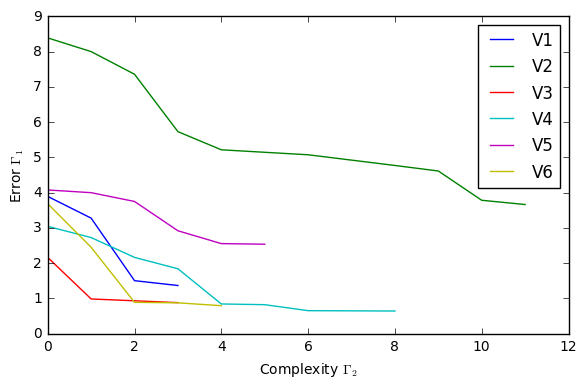

In [454]:
result_summary_ffx(ffx_results,varnames)

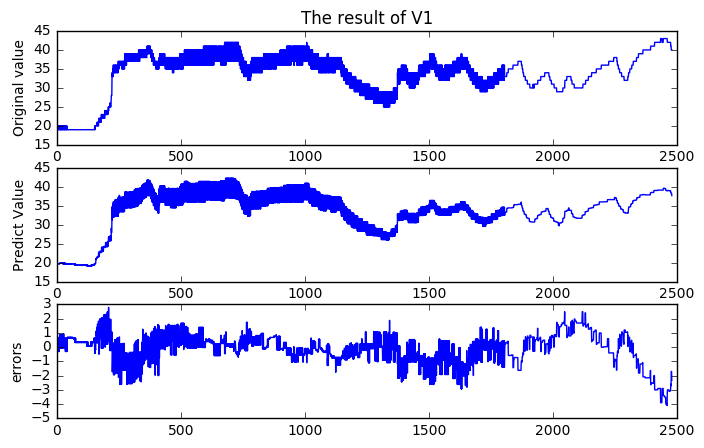

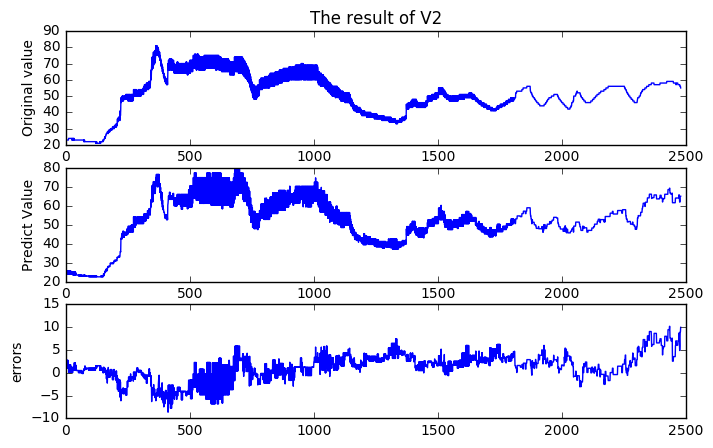

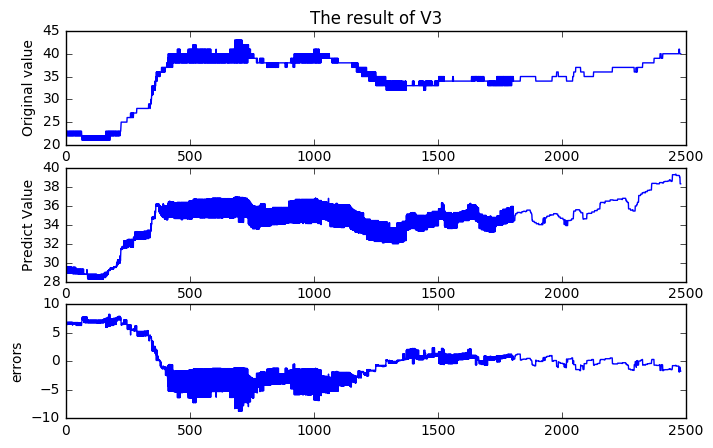

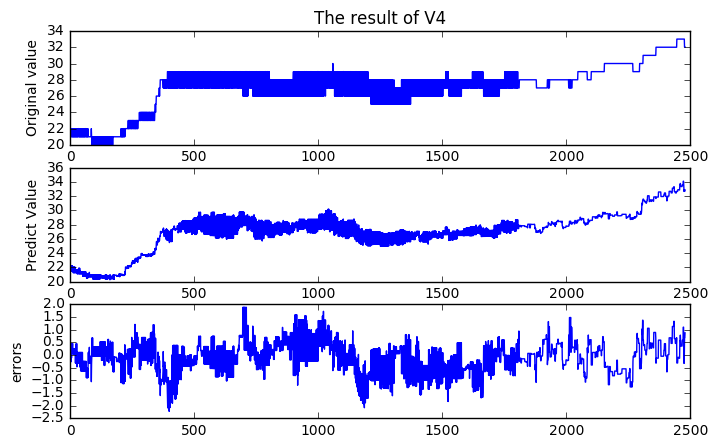

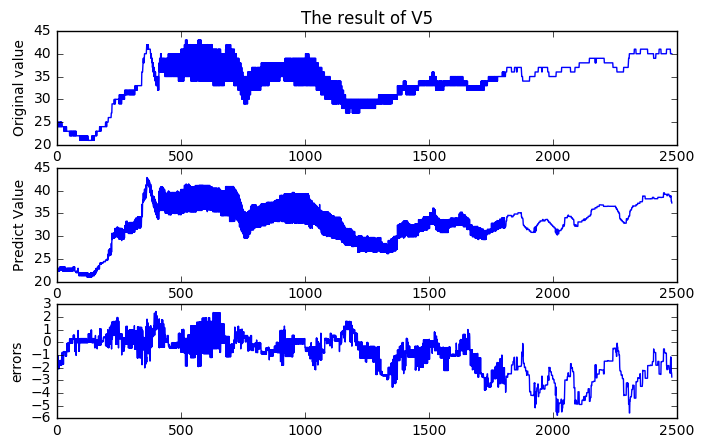

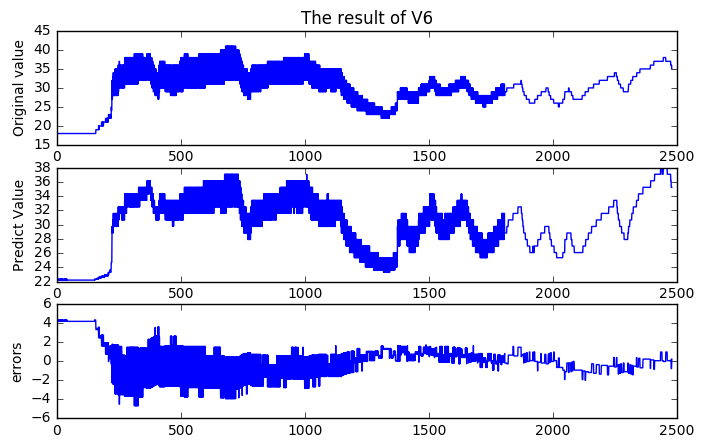

In [451]:
## plot for each signal with the last model

for i,result in zip(np.arange(0,6),ffx_results):
    coms,nrmses,rmses,models = result
    cols = list(np.arange(0,6))
    del cols[i]
    y = data[:,i]
    X = data[:,cols]
    model = models[-1] # the last model
    yp = model.simulate(X)
    
    f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,5))

    ax1.set_title('The result of V%d'%(i+1)) 
    ax1.plot(y)
    ax1.set_ylabel('Original value')
    ax2.plot(yp)
    ax2.set_ylabel('Predict Value')
    ax3.plot(yp-y)
    ax3.set_ylabel('errors')

In [455]:
### Learn expression by ffx, main2
varnames = np.array(['V1','V2','V3','V4','V5','V6'])
ffx_results = list()
for i in np.arange(0,6):
    print("-------------------------learn V%d------------"%(i+1))
    cols = list(np.arange(0,6))
    del cols[i]
    fitted_result = run_ffx_main2(data,i,varnames,cols = cols)
    ffx_results.insert(i,fitted_result)
    print("--------------------end----------------------------")

-------------------------learn V1------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


--------------------end----------------------------
-------------------------learn V2------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


--------------------end----------------------------
-------------------------learn V3------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


--------------------end----------------------------
-------------------------learn V4------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


--------------------end----------------------------
-------------------------learn V5------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


--------------------end----------------------------
-------------------------learn V6------------


/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


--------------------end----------------------------


************************* V1 *********************
33.8
-7.96 + 28.4*log10(V6)
-49.2 + 47.5*log10(V6) + 7.77*log10(V2)
-52.3 + 48.8*log10(V6) + 7.58*log10(V2) + 1.06*log10(V3)
-62.0 + 50.4*log10(V6) + 12.2*log10(V2) + 0.00519*V4^2 - 0.00239*V5^2
-61.4 + 48.4*log10(V6) + 16.9*log10(V2) - 5.26*log10(V3) + 0.462*V4 - 0.266*V5
-21.5 + 35.3*log10(V6) + 3.09*log10(V2) + 1.32*max(0,V4-31.3) - 0.370*max(0,31.8-V6) - 0.0464*max(0,62.8-V2) - 0.0151*max(0,34.9-V6)
-21.8 + 35.6*log10(V6) + 3.00*log10(V2) + 1.38*max(0,V4-31.3) - 0.372*max(0,31.8-V6) - 0.0480*max(0,62.8-V2) - 0.00806*max(0,34.9-V6) - 0.00468*max(0,28.3-V3)
-19.5 + 33.1*log10(V6) + 3.20*log10(V2) + 1.61*max(0,V4-31.3) - 0.384*max(0,31.8-V6) - 0.0500*max(0,62.8-V2) - 0.0408*max(0,28.3-V3) + 0.0332*V6 + 0.0323*max(0,V4-29.5)
-19.2 + 33.0*log10(V6) + 3.13*log10(V2) + 1.63*max(0,V4-31.3) - 0.385*max(0,31.8-V6) - 0.0497*max(0,62.8-V2) - 0.0436*max(0,28.3-V3) + 0.0349*max(0,V4-29.5) + 0.0341*V6 - 0.00101*max(0,70.4-V2)
-18.6 + 32.8*log10(V

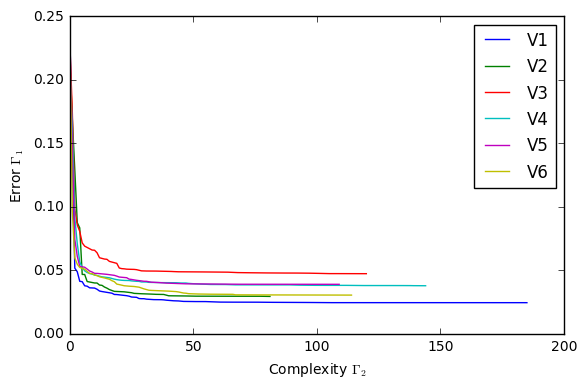

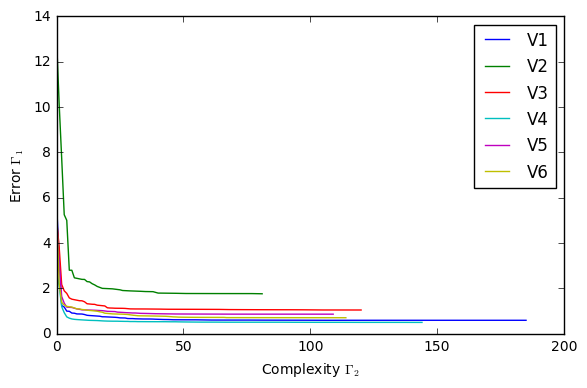

In [456]:
result_summary_ffx(ffx_results,varnames)

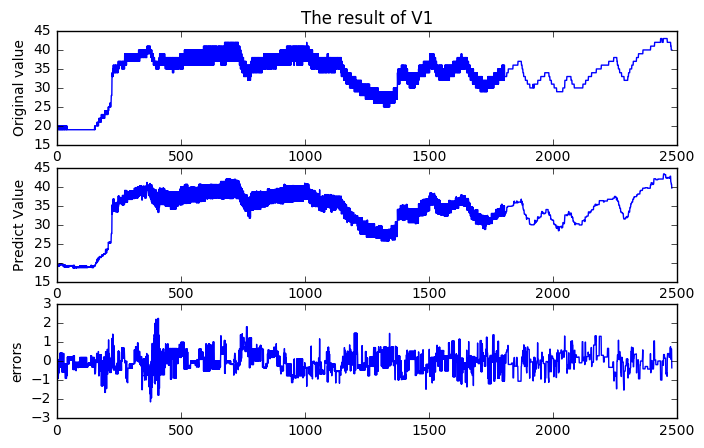

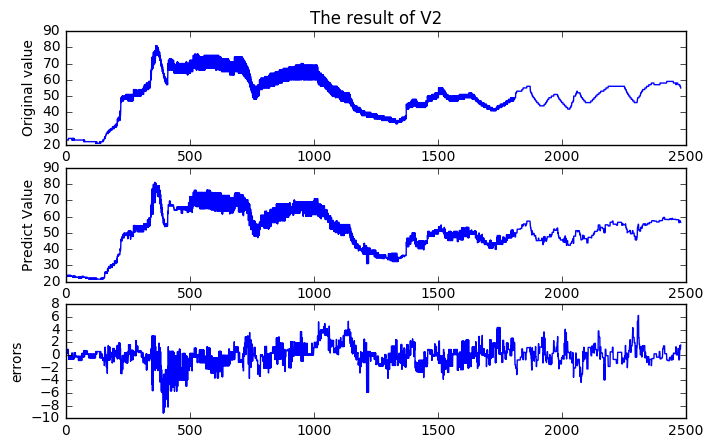

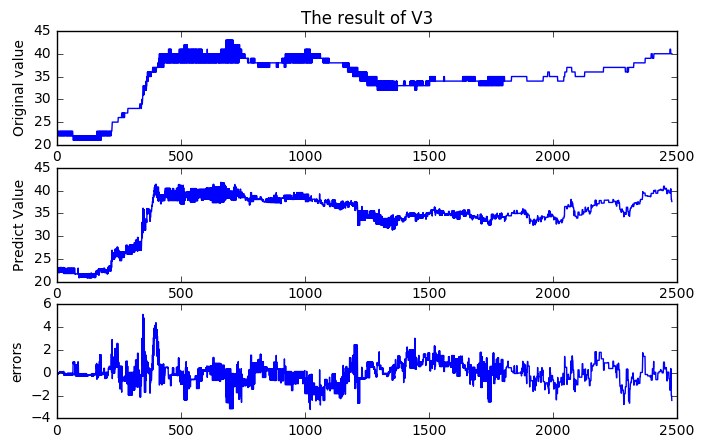

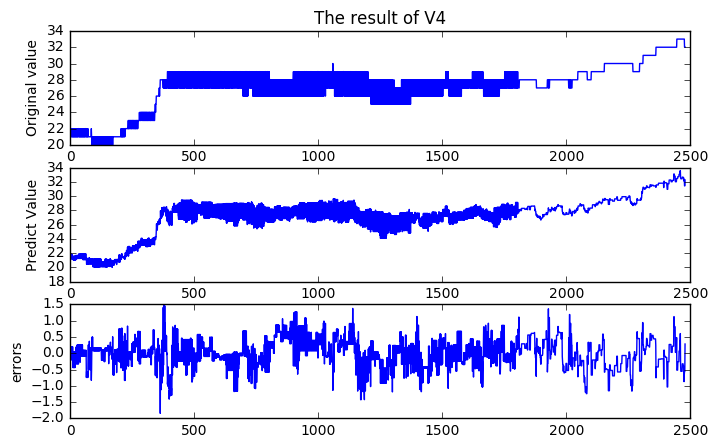

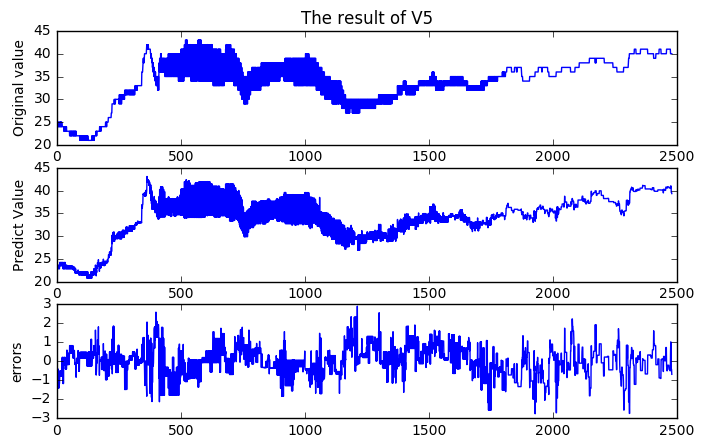

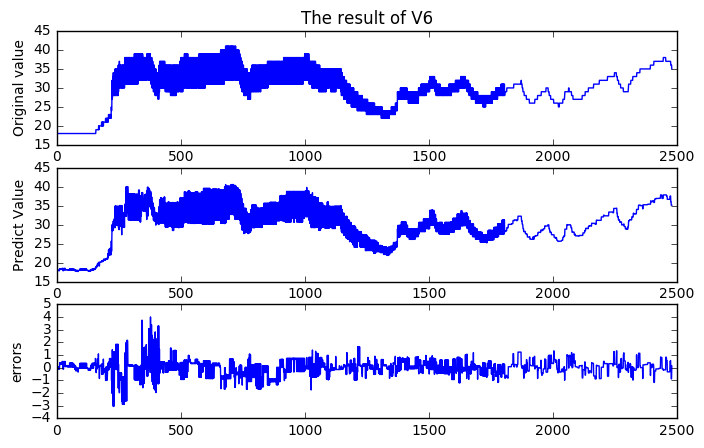

In [457]:
## plot for each signal with the last model

for i,result in zip(np.arange(0,6),ffx_results):
    coms,nrmses,rmses,models = result
    cols = list(np.arange(0,6))
    del cols[i]
    y = data[:,i]
    X = data[:,cols]
    model = models[-1] # the last model
    yp = model.simulate(X)
    
    f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,5))

    ax1.set_title('The result of V%d'%(i+1)) 
    ax1.plot(y)
    ax1.set_ylabel('Original value')
    ax2.plot(yp)
    ax2.set_ylabel('Predict Value')
    ax3.plot(yp-y)
    ax3.set_ylabel('errors')

### Symbolic regression with Deap

In [364]:
## import deap
from deap import base
from deap import creator
from deap import tools
from deap import gp
import random
seed = 42
random.seed(seed)
np.random.seed(seed)

In [365]:
class MyGPTree(gp.PrimitiveTree):

    def __init__(self, content, op=str):
        gp.PrimitiveTree.__init__(self, content)
        self.op = op

    def __hash__(self):
        return hash(self.op(self))

    def __eq__(self, other):
        return self.op(self) == self.op(other)


def remove_twins(pop):
    return list(set(pop))

############ operator define
def _div(left, right):
    with np.errstate(divide='ignore', invalid='ignore'):
        x = np.divide(left, right)
        if isinstance(x, np.ndarray):
            x[np.isinf(x)] = 0
            x[np.isnan(x)] = 0
        elif np.isinf(x) or np.isnan(x):
            x = 0
    return x

def _pow(y, n=1):
    with np.errstate(divide='ignore', invalid='ignore'):
        x = np.power(y, n)
        if isinstance(x, np.ndarray):
            x[np.isinf(x)] = 0
            x[np.isnan(x)] = 0
        elif np.isinf(x) or np.isnan(x):
            x = 0
    return x

def _log(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        x = np.log(x)
        if isinstance(x, np.ndarray):
            x[np.isinf(x)] = 1
            x[np.isnan(x)] = 1
        elif np.isinf(x) or np.isnan(x):
            x = 1
    return x

def _sqrt(x):
    with np.errstate(invalid='ignore'):
        x = np.sqrt(x)
        if isinstance(x, np.ndarray):
            x[np.isinf(x)] = 0
            x[np.isnan(x)] = 0
        elif np.isinf(x) or np.isnan(x):
            x = 1
    return x

def prepare_funcset(strat, n):
    funcset = gp.PrimitiveSet("MAIN", n)

    funcset.addPrimitive(np.add, 2, name="Add")
    funcset.addPrimitive(np.subtract, 2, name="Sub")
    funcset.addPrimitive(np.multiply, 2, name="Mul")
    funcset.addPrimitive(_div, 2, name="Div")

    if "symc" in strat:
        id_ = len([x for x in dir(gp) if "symc" in x])   # number of instances of symc Ephemeral class
        funcset.addEphemeralConstant("symc{}".format(id_), lambda: 1.0)

    if "pot" in strat:
        funcset.addPrimitive(np.square, 1, name="square")
        funcset.addPrimitive(_sqrt, 1, name="sqrt")
    if "exp" in strat:
        funcset.addPrimitive(np.exp, 1, name="exp")
        funcset.addPrimitive(_log, 1, name="log")
    if "trigo" in strat:
        funcset.addPrimitive(np.sin, 1, name="sin")
        funcset.addPrimitive(np.cos, 1, name="cos")
        
    return funcset


############################## Optimize
import scipy.optimize as opt
import copy


def generate_context(pset, data):
    context = {arg: dat for arg, dat in zip(pset.arguments, data.T)}
    context.update(pset.context)

    return context


def optimize_constants(ind, cost, context, precision=3, options=None, constraints=None):
    """ Update the constant values of ind according to:
    vec(c) = argmin_c ||yhat(data,c) - y||

    This needs to be called together when using symbolic constants.
    It may be called as a mutation operator together with the usage of ercs.
    """
    idx = [index for index, node in enumerate(ind) if isinstance(node, gp.Ephemeral)]

    if len(idx) == 0:
        return ind

    values = [ind[i].value for i in idx]
    values_bak = copy.copy(values)
    args = [("c%i" % i) for i in range(len(idx))]

    code = str(ind)
    for i, arg in zip(idx, args):
        code = code.replace(ind[i].format(), arg, 1)
    code = "lambda {args}: {code}".format(args=",".join(args), code=code)
    yhat = eval(code, context, {})
    with np.errstate(invalid='ignore', over='ignore'):
        res = opt.minimize(cost, values, args=yhat, options=options, constraints=constraints)

    if res.success and all(np.isfinite(res.x)):
        values = res.x
    else:
        values = values_bak

    for i, value in zip(idx, values):
        ind[i] = type(ind[i])()
        ind[i].value = round(value, 3)

    return ind

########################## simplify the expression
import re
from sympy import simplify, lambdify

def convert_inverse_prim(prim, args):
    """
    Convert inverse prims according to:
    [Dd]iv(a,b) -> Mul[a, 1/b]
    [Ss]ub(a,b) -> Add[a, -b]

    We achieve this by overwriting the corresponding format method of the sub and div prim.
    """

    prim.name = re.sub(r'([A-Z])', lambda pat: pat.group(1).lower(), prim.name)    #lower all capital letters

    converter = {
        'sub': lambda *args_: "Add({}, Mul(-1,{}))".format(*args_),
        'div': lambda *args_: "Mul({}, Pow({}, -1))".format(*args_)
    }
    prim_formatter = converter.get(prim.name, prim.format)

    return prim_formatter(*args)


def stringify_for_sympy(f):
    """Return the expression in a human readable string.
    """
    string = ""
    stack = []
    for node in f:
        stack.append((node, []))
        while len(stack[-1][1]) == stack[-1][0].arity:
            prim, args = stack.pop()
            string = convert_inverse_prim(prim, args)
            if len(stack) == 0:
                break  # If stack is empty, all nodes should have been seen
            stack[-1][1].append(string)
    return string


def simplify_this(expr):
    return simplify(stringify_for_sympy(expr))


In [375]:
### run_gp function (main function)
import operator

hyper = {'gen': 50, 'mu': 500, 'cxpb': 0.5}

def run_gp(train_X,train_y,test_X,test_y,varnames, hyper=hyper):
    
    funcset = prepare_funcset(["exp", "symc", "pot", "trigo"], train_X.shape[1])
    
    new_varnames = {'ARG%i' % i: var for i, var in enumerate(varnames)}
    funcset.renameArguments(**new_varnames)
    
    toolbox = base.Toolbox()
    toolbox.register("compile", gp.compile, pset=funcset)
    
    def error_(ind, compile, y, X):
        model = compile(expr=ind)
        yhat = model(*X.T)
        return np.sqrt(np.nanmean((y-yhat)**2))
    
    error = lambda ind: error_(ind, toolbox.compile, train_y, train_X)
    
    finalize = lambda ind: error_(ind, toolbox.compile, test_y, test_X)
    
    def _evaluate(ind):
        return error(ind), len(ind)
    
    optimize_options = {'maxiter': 5}
    cons = ({'type': 'ineq', 'fun': lambda x: 10.0-np.abs(x)})
    context = generate_context(funcset, train_X)
    cost = lambda args, yhat: np.sum((train_y - yhat(*args))**2)
    
    optimize = lambda ind: optimize_constants(ind, cost=cost, context=context,
                                              options=optimize_options, constraints=cons)
    
    creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))
    creator.create("Individual", MyGPTree, fitness=creator.Fitness)

    toolbox.register("expr", gp.genHalfAndHalf, pset=funcset, min_=1, max_=4)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("select", tools.selNSGA2)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genHalfAndHalf, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=funcset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    toolbox.register("evaluate", _evaluate)
    
    def evolve(toolbox, seed=seed, gen=0, mu=1, lambda_=1, cxpb=1, mutp=0):
        random.seed(seed)
        np.random.seed(seed)

        pop = remove_twins(toolbox.population(n=mu))
        pop = list(toolbox.map(optimize, pop))

        invalid_ind = [ind for ind in pop if not ind.fitness.valid]
        fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitnesses):
            
            ind.fitness.values = fit

        pop = toolbox.select(pop, mu)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("min", np.nanmin, axis=0)
        stats.register("max", np.nanmax, axis=0)
        stats.register("diversity", lambda pop: len(set(map(str, pop))))

        logbook = tools.Logbook()
        logbook.header = "gen", "evals", "min", "max", "diversity"

        record = stats.compile(pop)
        logbook.record(gen=0, evals=len(invalid_ind), **record)
        print(logbook.stream)
        if record['min'][0] == 0.0:
            return pop, logbook

        for gen in range(1, gen):
            offspring = tools.selRandom(pop, mu)
            offspring = [toolbox.clone(ind) for ind in offspring]

            for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
                if random.random() <= cxpb:
                    toolbox.mate(ind1, ind2)

                toolbox.mutate(ind1)
                toolbox.mutate(ind2)
                del ind1.fitness.values, ind2.fitness.values

            offspring = list(toolbox.map(optimize, offspring))

            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit

            pop = toolbox.select(remove_twins(pop+offspring), mu)
            record = stats.compile(pop)
            logbook.record(gen=gen, evals=len(invalid_ind), **record)

            print(logbook.stream)
            if record['min'][0] < 1E-4:
                break

        return pop, logbook
    
    pop, log = evolve(toolbox, **hyper)
    
    pareto = tools.ParetoFront()
    pareto.update(pop)
    
    train_error = np.array([ind.fitness.values[0] for ind in pareto])  # store so we can quickly access this

    fitnesses = list(toolbox.map(finalize, pareto))
    for ind, fit in zip(pareto, fitnesses):
            ind.fitness.values = fit, len(ind)
    
    error, complexity = map(np.array, zip(*[ind.fitness.values for ind in pareto]))
    models_compiled = [toolbox.compile(m) for m in pareto]
    return [complexity, error], [complexity, train_error], pareto, models_compiled

In [458]:
def summary_gpresult(gp_result):
    front, front_train, front_models,_= gp_result
    comp, error = front
    print("-------------- gp result-------------------")
    #plt.plot(comp, error)
    #plt.xlabel(r"Complexity $\Gamma_2$")
    #plt.ylabel(r"Error $\Gamma_1$")
    print("model","\t\t","Complexity","\t\t","Error")
    for model,cm,err in zip(front_models,comp,error):
        print(simplify_this(model),"\t",cm,"\t\t",err)
        print()

def cal_nrmse_gp(model,X,y):
    return np.sqrt(np.nanmean((model(*X.T)-y)**2))/(max(y)-min(y))
def cal_rmse_gp(model,X,y):
    return np.sqrt(np.nanmean((model(*X.T)-y)**2))
    
def run_gp_main(data,y_i,varnames,train_ratio,cols):
    lag = np.round( train_ratio * len(data) )
    train_X = data[1:(len(data)-lag),cols]
    train_y = data[1:(len(data)-lag):,y_i]
    test_X = data[(len(data)-lag)::,cols]
    test_y = data[(len(data)-lag)::,y_i]
    
    fitted_result = run_gp(train_X,train_y,test_X,test_y,varnames[cols])
    
    front_test,front_train, models, models_bin = fitted_result
    comp,_ = front_test
    
    test_nrmse = [ cal_nrmse_gp(model,test_X,test_y) for model in models_bin ]
    test_rmse = [ cal_rmse_gp(model,test_X,test_y) for model in models_bin ]
    
    train_nrmse = [ cal_nrmse_gp(model,train_X,train_y) for model in models_bin ]
    train_rmse = [ cal_rmse_gp(model,train_X,train_y) for model in models_bin ]
    
    return comp,[test_nrmse,train_nrmse],[test_rmse,train_rmse],models,models_bin

def run_gp_main2(data,y_i,varnames,cols):
    train_X = data[::2,cols]
    train_y = data[::2,y_i]
    test_X = data[1::2,cols]
    test_y = data[1::2,y_i]
    
    fitted_result = run_gp(train_X,train_y,test_X,test_y,varnames[cols])
    
    front_test,front_train, models, models_bin = fitted_result
    comp,_ = front_test
    
    test_nrmse = [ cal_nrmse_gp(model,test_X,test_y) for model in models_bin ]
    test_rmse = [ cal_rmse_gp(model,test_X,test_y) for model in models_bin ]
    
    train_nrmse = [ cal_nrmse_gp(model,train_X,train_y) for model in models_bin ]
    train_rmse = [ cal_rmse_gp(model,train_X,train_y) for model in models_bin ]
    
    return comp,[test_nrmse,train_nrmse],[test_rmse,train_rmse],models,models_bin


def result_summary_gp(results,varnames):
    for result,name in zip(results,varnames):
        coms,nrmses,rmses,models,_ = result
        nrmses_test, nrmses_train = nrmses
        rmses_test,rmses_train = rmses
        print("************************* %s *********************"%name)
        for model in models:
            print(simplify_this(model))
        print("---------------------------------------------------------------------------------")
        print("complexity         nrmse_test         nrmse_train         rmse_test         rmse_train")
        for com,nrmse_test,nrmse_train,rmse_test,rmse_train in zip(coms,nrmses_test,nrmses_train,rmses_test,rmses_train):
            print("%f         %f         %f         %f         %f"%(com,nrmse_test,nrmse_train,rmse_test,rmse_train))
        print("*********************************************************************")
   
    plt.figure()
    for result,name in zip(results,varnames):
        coms,nrmses,rmses,_,_ = result
        nrmses_test,_= nrmses
        plt.plot(coms,nrmses_test,label=name)
    plt.xlabel(r"Complexity $\Gamma_2$")
    plt.ylabel(r"Error $\Gamma_1$")
    plt.legend()
    plt.tight_layout()
    
    plt.figure()
    for result,name in zip(results,varnames):
        coms,nrmses,rmses,_,_ = result
        rmses_test,_= rmses
        plt.plot(coms,rmses_test,label=name)
    plt.xlabel(r"Complexity $\Gamma_2$")
    plt.ylabel(r"Error $\Gamma_1$")
    plt.legend()
    plt.tight_layout()

In [459]:
### Learn expression by deap
train_ratio = 0.5
varnames = np.array(['V1','V2','V3','V4','V5','V6'])
gp_results = list()
for i in np.arange(0,6):
    print("********************processing %d********************"%i)
    cols = list(np.arange(0,6))
    del cols[i]
    result = run_gp_main(data,i,varnames,train_ratio = train_ratio,cols = cols)
    gp_results.insert(i,result)
    print("*****************************************************")

********************processing 0********************


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


gen	evals	min                      	max        	diversity
0  	401  	[ 1.88232574  2.        ]	[ inf  21.]	376      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


1  	500  	[ 1.88232574  1.        ]	[ inf  15.]	448      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


2  	500  	[ 1.88232574  1.        ]	[ inf   5.]	440      
3  	500  	[ 1.88232574  1.        ]	[  7.76813275e+33   1.10000000e+01]	439      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 1.88232574  1.        ]	[  7.76813275e+33   7.00000000e+00]	427      
5  	500  	[ 1.88232574  1.        ]	[  7.76813275e+33   1.10000000e+01]	445      
6  	500  	[ 1.88232574  1.        ]	[  7.76813275e+33   1.20000000e+01]	441      
7  	500  	[ 1.88232574  1.        ]	[  7.76813275e+33   1.20000000e+01]	437      
8  	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.70000000e+01]	444      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 1.80113111  1.        ]	[ inf  19.]                        	435      
10 	500  	[ 1.80113111  1.        ]	[ inf  13.]                        	429      
11 	500  	[ 1.80113111  1.        ]	[ inf  10.]                        	421      
12 	500  	[ 1.80113111  1.        ]	[  2.48834212e+36   4.00000000e+00]	406      
13 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   5.00000000e+00]	404      
14 	500  	[ 1.78971183  1.        ]	[  7.76813275e+33   1.00000000e+01]	405      
15 	500  	[ 1.78971183  1.        ]	[  7.76813275e+33   1.10000000e+01]	395      
16 	500  	[ 1.78971183  1.        ]	[  7.76813275e+33   1.30000000e+01]	390      
17 	500  	[ 1.78971183  1.        ]	[  7.76813275e+33   1.30000000e+01]	406      
18 	500  	[ 1.78971183  1.        ]	[  7.76813275e+33   1.30000000e+01]	410      
19 	500  	[ 1.75809775  1.        ]	[  7.76813275e+33   1.30000000e+01]	409      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


20 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   9.00000000e+00]	407      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


21 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   6.00000000e+00]	402      
22 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.00000000e+01]	389      
23 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.10000000e+01]	379      
24 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.30000000e+01]	380      
25 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.20000000e+01]	373      
26 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.20000000e+01]	376      
27 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.50000000e+01]	376      
28 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.50000000e+01]	371      
29 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.70000000e+01]	368      
30 	500  	[ 1.56288762  1.        ]	[  7.76813275e+33   1.80000000e+01]	379      
31 	500  	[ 1.41939883  1.        ]	[  7.76813275e+33   1.80000000e+01]	380      
32 	500  	[ 1.41939883  1.        ]	[  7.76813275e+33   2.00000000e+01]	373      
33 	500  	[ 1.41

/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


gen	evals	min                      	max        	diversity
0  	401  	[ 6.90486488  2.        ]	[ inf  21.]	378      
1  	500  	[ 6.07485359  1.        ]	[  6.17334310e+17   1.50000000e+01]	461      
2  	500  	[ 6.07485359  1.        ]	[ inf  15.]                        	455      
3  	500  	[ 6.07485359  1.        ]	[ inf  15.]                        	441      
4  	500  	[ 6.07485359  1.        ]	[ inf  12.]                        	437      
5  	500  	[ 7.13217331  1.        ]	[  6.17334310e+17   4.00000000e+00]	424      
6  	500  	[ 6.12717285  1.        ]	[  6.17334310e+17   1.00000000e+01]	436      
7  	500  	[ 6.12717285  1.        ]	[  6.17334310e+17   1.00000000e+01]	436      
8  	500  	[ 6.12717285  1.        ]	[  6.17334310e+17   1.10000000e+01]	435      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 6.12717285  1.        ]	[  6.17334310e+17   5.00000000e+00]	421      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


10 	500  	[ 6.12717285  1.        ]	[  6.17334310e+17   5.00000000e+00]	416      
11 	500  	[ 5.75873151  1.        ]	[  6.17334310e+17   1.00000000e+01]	410      
12 	500  	[ 5.75873151  1.        ]	[  6.17334310e+17   1.60000000e+01]	405      
13 	500  	[ 3.2945662  1.       ]  	[  6.17334310e+17   1.60000000e+01]	407      
14 	500  	[ 3.2945662  1.       ]  	[  6.17334310e+17   1.40000000e+01]	403      
15 	500  	[ 3.2945662  1.       ]  	[  6.17334310e+17   1.30000000e+01]	392      
16 	500  	[ 3.2945662  1.       ]  	[ inf  12.]                        	390      
17 	500  	[ 3.2945662  1.       ]  	[ inf  12.]                        	390      
18 	500  	[ 3.2945662  1.       ]  	[ inf  12.]                        	382      
19 	500  	[ 5.95893713  1.        ]	[  6.17334310e+17   4.00000000e+00]	386      
20 	500  	[ 5.78929415  1.        ]	[  6.17334310e+17   1.00000000e+01]	386      
21 	500  	[ 5.78929415  1.        ]	[  6.17334310e+17   1.10000000e+01]	386      
22 	500  	[ 5.78

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


33 	500  	[ 4.85250419  1.        ]	[  6.17334310e+17   8.00000000e+00]	369      
34 	500  	[ 4.85250419  1.        ]	[  6.17334310e+17   1.30000000e+01]	363      
35 	500  	[ 4.85250419  1.        ]	[  6.17334310e+17   1.30000000e+01]	360      
36 	500  	[ 4.85250419  1.        ]	[  6.17334310e+17   1.30000000e+01]	353      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


37 	500  	[ 4.85250419  1.        ]	[  9.73741150e+18   1.30000000e+01]	367      
38 	500  	[ 4.85250419  1.        ]	[  6.17334310e+17   1.30000000e+01]	376      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


39 	500  	[ 4.85250419  1.        ]	[ inf  13.]                        	386      
40 	500  	[ 5.95893713  1.        ]	[  6.17334310e+17   4.00000000e+00]	390      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


41 	500  	[ 5.78929415  1.        ]	[  6.17334310e+17   6.00000000e+00]	391      
42 	500  	[ 5.50487797  1.        ]	[  6.17334310e+17   1.00000000e+01]	390      
43 	500  	[ 5.50487797  1.        ]	[  6.17334310e+17   1.60000000e+01]	391      
44 	500  	[ 5.50487797  1.        ]	[  6.17334310e+17   1.60000000e+01]	385      
45 	500  	[ 5.50487797  1.        ]	[  6.17334310e+17   1.60000000e+01]	384      
46 	500  	[ 4.99764182  1.        ]	[  6.17334310e+17   1.60000000e+01]	385      
47 	500  	[ 4.99764182  1.        ]	[  6.17334310e+17   1.90000000e+01]	392      
48 	500  	[ 4.99764182  1.        ]	[  6.17334310e+17   1.90000000e+01]	393      
49 	500  	[ 4.99764182  1.        ]	[  6.17334310e+17   2.00000000e+01]	390      
*****************************************************
********************processing 2********************


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


gen	evals	min                      	max        	diversity
0  	401  	[ 3.84132086  2.        ]	[ inf  21.]	374      
1  	500  	[ 3.84132086  1.        ]	[  7.76813275e+33   1.50000000e+01]	454      
2  	500  	[ 3.84132086  1.        ]	[  7.76813275e+33   1.50000000e+01]	453      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


3  	500  	[ 3.84132086  1.        ]	[  7.76813275e+33   1.20000000e+01]	442      
4  	500  	[ 3.84132086  1.        ]	[  7.76813275e+33   1.80000000e+01]	451      
5  	500  	[ 3.84132086  1.        ]	[  7.76813275e+33   1.70000000e+01]	455      
6  	500  	[ 3.84132086  1.        ]	[  7.76813275e+33   1.70000000e+01]	452      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


7  	500  	[ 3.80554729  1.        ]	[  7.76813275e+33   8.00000000e+00]	438      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


8  	500  	[ 3.80554729  1.        ]	[  7.76813275e+33   8.00000000e+00]	432      
9  	500  	[ 3.58351755  1.        ]	[  7.76813275e+33   1.30000000e+01]	420      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


10 	500  	[ 3.58351755  1.        ]	[  7.76813275e+33   8.00000000e+00]	410      
11 	500  	[ 3.58351755  1.        ]	[  7.76813275e+33   1.20000000e+01]	401      
12 	500  	[ 3.58351755  1.        ]	[  7.76813275e+33   1.60000000e+01]	393      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


13 	500  	[ 3.59474003  1.        ]	[  5.37540516e+34   6.00000000e+00]	387      
14 	500  	[ 3.31362589  1.        ]	[  5.37540516e+34   1.10000000e+01]	397      
15 	500  	[ 3.31362589  1.        ]	[ inf   8.]                        	401      
16 	500  	[ 3.31362589  1.        ]	[ inf   7.]                        	400      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


17 	500  	[ 3.6199151  1.       ]  	[  7.76813275e+33   4.00000000e+00]	395      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


18 	500  	[ 3.6199151  1.       ]  	[  7.76813275e+33   5.00000000e+00]	391      
19 	500  	[ 3.6199151  1.       ]  	[  7.76813275e+33   8.00000000e+00]	392      
20 	500  	[ 3.6199151  1.       ]  	[  7.76813275e+33   9.00000000e+00]	386      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


21 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   9.00000000e+00]	378      
22 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.30000000e+01]	380      
23 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.30000000e+01]	391      
24 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.40000000e+01]	396      
25 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.40000000e+01]	386      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


26 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   7.00000000e+00]	385      
27 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.00000000e+01]	369      
28 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.30000000e+01]	359      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


29 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   7.00000000e+00]	358      
30 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.20000000e+01]	376      
31 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.30000000e+01]	366      
32 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.70000000e+01]	368      
33 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.70000000e+01]	365      
34 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.70000000e+01]	373      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


35 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   9.00000000e+00]	368      
36 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.10000000e+01]	369      
37 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.30000000e+01]	371      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


38 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   7.00000000e+00]	368      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


39 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   9.00000000e+00]	367      
40 	500  	[ 1.26479905  1.        ]	[  7.76813275e+33   1.40000000e+01]	370      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


41 	500  	[ 1.44879732  1.        ]	[  7.76813275e+33   6.00000000e+00]	365      
42 	500  	[ 1.44879732  1.        ]	[  7.76813275e+33   9.00000000e+00]	360      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


43 	500  	[ 1.44879732  1.        ]	[  7.76813275e+33   8.00000000e+00]	357      
44 	500  	[ 1.44879732  1.        ]	[  7.76813275e+33   1.00000000e+01]	359      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


45 	500  	[ 1.44879732  1.        ]	[  7.76813275e+33   6.00000000e+00]	354      
46 	500  	[ 1.44879732  1.        ]	[  7.76813275e+33   9.00000000e+00]	352      
47 	500  	[ 0.87162418  1.        ]	[  7.76813275e+33   1.20000000e+01]	350      
48 	500  	[ 0.87162418  1.        ]	[  7.76813275e+33   7.00000000e+00]	346      
49 	500  	[ 0.87162418  1.        ]	[  7.76813275e+33   8.00000000e+00]	347      
*****************************************************
********************processing 3********************


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: Visi

gen	evals	min                      	max        	diversity
0  	401  	[ 2.87147038  2.        ]	[ inf  21.]	374      
1  	500  	[ 2.50698244  1.        ]	[  7.76813275e+33   1.70000000e+01]	462      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


2  	500  	[ 2.50698244  1.        ]	[ inf  17.]                        	451      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


3  	500  	[ 2.03630481  1.        ]	[ inf   5.]                        	436      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 1.70697458  1.        ]	[ inf   5.]                        	418      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


5  	500  	[ 1.70697458  1.        ]	[  7.76813275e+33   4.00000000e+00]	419      
6  	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.10000000e+01]	434      
7  	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.30000000e+01]	442      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


8  	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   6.00000000e+00]	444      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 1.31446145  1.        ]	[ inf   8.]                        	430      
10 	500  	[ 1.70697458  1.        ]	[  7.76813275e+33   4.00000000e+00]	421      
11 	500  	[ 1.58965981  1.        ]	[  7.76813275e+33   9.00000000e+00]	426      
12 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.00000000e+01]	425      
13 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.00000000e+01]	425      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


14 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   7.00000000e+00]	414      
15 	500  	[ 1.23961305  1.        ]	[  7.76813275e+33   1.20000000e+01]	413      
16 	500  	[ 1.23961305  1.        ]	[  7.76813275e+33   1.40000000e+01]	410      
17 	500  	[ 1.23961305  1.        ]	[  7.76813275e+33   1.40000000e+01]	414      
18 	500  	[ 0.91925815  1.        ]	[  7.76813275e+33   1.40000000e+01]	425      
19 	500  	[ 0.91925815  1.        ]	[  7.76813275e+33   1.50000000e+01]	424      
20 	500  	[ 0.91925815  1.        ]	[  7.76813275e+33   1.90000000e+01]	427      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


21 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   6.00000000e+00]	428      
22 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   1.10000000e+01]	421      
23 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   1.10000000e+01]	421      
24 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   1.10000000e+01]	419      
25 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   1.10000000e+01]	419      
26 	500  	[ 0.93225462  1.        ]	[  7.76813275e+33   1.20000000e+01]	421      
27 	500  	[ 0.93225462  1.        ]	[  7.76813275e+33   1.30000000e+01]	420      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


28 	500  	[ 0.93225462  1.        ]	[  7.76813275e+33   1.10000000e+01]	425      
29 	500  	[ 0.93225462  1.        ]	[  7.76813275e+33   1.30000000e+01]	421      
30 	500  	[ 0.93225462  1.        ]	[  7.76813275e+33   1.30000000e+01]	412      
31 	500  	[ 0.93225462  1.        ]	[  7.76813275e+33   1.40000000e+01]	413      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


32 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   6.00000000e+00]	408      
33 	500  	[ 1.10816694  1.        ]	[  7.76813275e+33   1.00000000e+01]	402      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


34 	500  	[ 1.10816694  1.        ]	[ inf  10.]                        	411      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


35 	500  	[ 1.10816694  1.        ]	[ inf   8.]                        	419      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


36 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   4.00000000e+00]	419      
37 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.00000000e+01]	432      
38 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.30000000e+01]	430      
39 	500  	[ 1.2450718  1.       ]  	[  7.76813275e+33   1.30000000e+01]	432      
40 	500  	[ 1.2450718  1.       ]  	[  7.76813275e+33   1.30000000e+01]	426      
41 	500  	[ 1.2450718  1.       ]  	[  7.76813275e+33   1.30000000e+01]	426      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


42 	500  	[ 1.2450718  1.       ]  	[  7.76813275e+33   1.10000000e+01]	428      
43 	500  	[ 1.2450718  1.       ]  	[  7.76813275e+33   1.10000000e+01]	441      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


44 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   7.00000000e+00]	434      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


45 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   6.00000000e+00]	424      
46 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.10000000e+01]	424      
47 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.10000000e+01]	422      
48 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.20000000e+01]	417      
49 	500  	[ 1.31446145  1.        ]	[  7.76813275e+33   1.40000000e+01]	416      
*****************************************************
********************processing 4********************


/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


gen	evals	min                      	max        	diversity
0  	401  	[ 2.61896524  2.        ]	[ inf  21.]	378      
1  	500  	[ 2.54758765  1.        ]	[ inf  13.]	462      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


2  	500  	[ 2.32944656  1.        ]	[  7.76813275e+33   6.00000000e+00]	451      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


3  	500  	[ 2.32944656  1.        ]	[  7.76813275e+33   7.00000000e+00]	441      
4  	500  	[ 2.32944656  1.        ]	[  7.76813275e+33   1.10000000e+01]	445      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


5  	500  	[ 2.32944656  1.        ]	[  7.76813275e+33   5.00000000e+00]	437      
6  	500  	[ 2.32944656  1.        ]	[  7.76813275e+33   1.00000000e+01]	442      
7  	500  	[ 2.32944656  1.        ]	[  7.76813275e+33   1.20000000e+01]	441      
8  	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.20000000e+01]	431      
9  	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.20000000e+01]	421      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


10 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   9.00000000e+00]	436      
11 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.10000000e+01]	434      
12 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.50000000e+01]	429      
13 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.50000000e+01]	424      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


14 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   7.00000000e+00]	408      
15 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.00000000e+01]	405      
16 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.40000000e+01]	406      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


17 	500  	[ 1.95316589  1.        ]	[ inf   7.]                        	394      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


18 	500  	[ 1.95316589  1.        ]	[ inf   7.]                        	388      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


19 	500  	[ 2.54758765  1.        ]	[  2.48834212e+36   4.00000000e+00]	381      
20 	500  	[ 2.54758765  1.        ]	[  7.76813275e+33   1.00000000e+01]	388      
21 	500  	[ 2.48678683  1.        ]	[  7.76813275e+33   1.00000000e+01]	385      
22 	500  	[ 2.48678683  1.        ]	[  7.76813275e+33   1.30000000e+01]	384      
23 	500  	[ 2.48678683  1.        ]	[  7.76813275e+33   1.60000000e+01]	392      
24 	500  	[ 2.32274839  1.        ]	[  7.76813275e+33   1.70000000e+01]	399      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


25 	500  	[ 2.32274839  1.        ]	[  7.76813275e+33   6.00000000e+00]	393      
26 	500  	[ 2.32274839  1.        ]	[  7.76813275e+33   1.00000000e+01]	393      
27 	500  	[ 2.32274839  1.        ]	[  7.76813275e+33   1.00000000e+01]	391      
28 	500  	[ 2.32274839  1.        ]	[  7.76813275e+33   1.00000000e+01]	397      
29 	500  	[ 2.32274839  1.        ]	[  7.76813275e+33   6.00000000e+00]	392      
30 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   1.00000000e+01]	389      
31 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   1.50000000e+01]	391      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


32 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   7.00000000e+00]	381      
33 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   9.00000000e+00]	376      
34 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   1.20000000e+01]	373      
35 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   1.20000000e+01]	373      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


36 	500  	[ 2.09591429  1.        ]	[  7.76813275e+33   6.00000000e+00]	370      
37 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.00000000e+01]	365      
38 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.20000000e+01]	369      
39 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.40000000e+01]	376      
40 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.40000000e+01]	373      
41 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.40000000e+01]	373      
42 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.80000000e+01]	374      
43 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.80000000e+01]	367      
44 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.90000000e+01]	374      
45 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   7.00000000e+00]	376      
46 	500  	[ 1.95316589  1.        ]	[  7.76813275e+33   1.20000000e+01]	370      
47 	500  	[ 1.75755125  1.        ]	[  7.76813275e+33   1.20000000e+01]	367      
48 	500  	[ 1.75

/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


gen	evals	min                      	max        	diversity
0  	401  	[ 1.82554981  2.        ]	[ inf  21.]	378      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


1  	500  	[ 1.82554981  1.        ]	[ inf   6.]	464      
2  	500  	[ 1.82554981  1.        ]	[ inf   6.]	443      
3  	500  	[ 1.82554981  1.        ]	[ inf  10.]	440      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 1.82554981  1.        ]	[  7.76813275e+33   4.00000000e+00]	439      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


5  	500  	[ 1.82554613  1.        ]	[  7.76813275e+33   7.00000000e+00]	443      
6  	500  	[ 1.82554613  1.        ]	[  7.76813275e+33   9.00000000e+00]	451      
7  	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.20000000e+01]	441      
8  	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.20000000e+01]	434      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   7.00000000e+00]	431      
10 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.10000000e+01]	436      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


11 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   7.00000000e+00]	435      
12 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.50000000e+01]	437      
13 	500  	[ 1.80113111  1.        ]	[ inf   5.]                        	427      
14 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   9.00000000e+00]	418      
15 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.00000000e+01]	415      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


16 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.10000000e+01]	416      
17 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.20000000e+01]	414      
18 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.20000000e+01]	414      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


19 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   8.00000000e+00]	414      
20 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.10000000e+01]	406      
21 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.10000000e+01]	411      
22 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.20000000e+01]	414      
23 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.60000000e+01]	417      
24 	500  	[ 1.80113111  1.        ]	[  7.76813275e+33   1.60000000e+01]	414      
25 	500  	[ 1.70714212  1.        ]	[  7.76813275e+33   1.70000000e+01]	409      
26 	500  	[ 1.70714212  1.        ]	[  7.76813275e+33   2.20000000e+01]	412      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


27 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   8.00000000e+00]	405      
28 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   7.00000000e+00]	401      
29 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.40000000e+01]	401      
30 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.40000000e+01]	400      
31 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.20000000e+01]	401      
32 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.30000000e+01]	410      
33 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.30000000e+01]	410      
34 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.50000000e+01]	406      
35 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.50000000e+01]	404      
36 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.50000000e+01]	413      
37 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.30000000e+01]	410      
38 	500  	[ 1.6668379  1.       ]  	[  7.76813275e+33   1.70000000e+01]	410      
39 	500  	[ 1.66

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


43 	500  	[ 1.50745403  1.        ]	[  7.76813275e+33   8.00000000e+00]	404      
44 	500  	[ 1.48792654  1.        ]	[  7.76813275e+33   1.30000000e+01]	396      
45 	500  	[ 1.48792654  1.        ]	[  7.76813275e+33   1.20000000e+01]	393      
46 	500  	[ 1.48792654  1.        ]	[  7.76813275e+33   1.20000000e+01]	388      
47 	500  	[ 1.48792654  1.        ]	[  7.76813275e+33   1.50000000e+01]	389      
48 	500  	[ 1.48792654  1.        ]	[  7.76813275e+33   1.50000000e+01]	389      
49 	500  	[ 1.48792654  1.        ]	[  7.76813275e+33   1.50000000e+01]	388      
*****************************************************


************************* V1 *********************
0.24399999999999999*V3 + 0.83399999999999996*V6
sqrt(V2) + 0.86899999999999999*V6
0.097000000000000003*V3 + V6
0.097000000000000003*V3 + V6
0.097000000000000003*V3 + V6
0.097000000000000003*V3 + V6
V6 + log(V3)
V6 + log(V3)
V6 + 3.27
V6 + 3.27
V6 + 3.27
V5
---------------------------------------------------------------------------------
complexity         nrmse_test         nrmse_train         rmse_test         rmse_train
9.000000         0.071373         0.061713         1.284712         1.419399
6.000000         0.086536         0.067952         1.557655         1.562888
5.000000         0.071584         0.072471         1.288514         1.666838
5.000000         0.071584         0.072471         1.288514         1.666838
5.000000         0.071584         0.072471         1.288514         1.666838
5.000000         0.071584         0.072471         1.288514         1.666838
4.000000         0.065508         0.078310         1.179137  

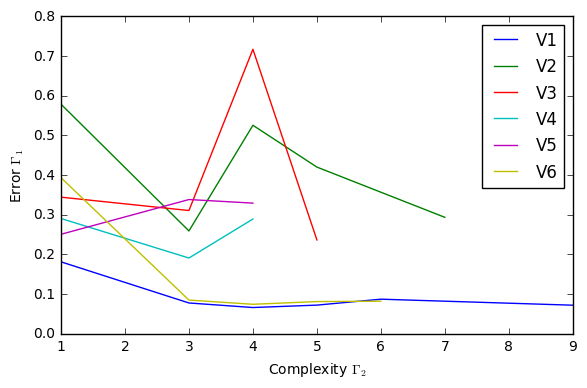

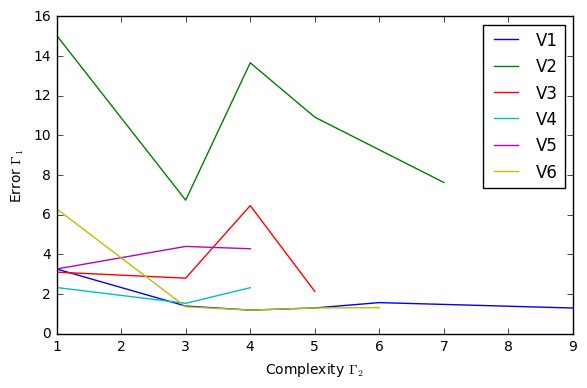

In [460]:
result_summary_gp(gp_results,varnames)

0.24399999999999999*V3 + 0.83399999999999996*V6
V1*(0.017999999999999999*V5 + 1)
V5 + sin(exp(square(V2)))
4.46*sqrt(V3)
4.532*sqrt(V2)
0.90800000000000003*V1 - sin(V4)


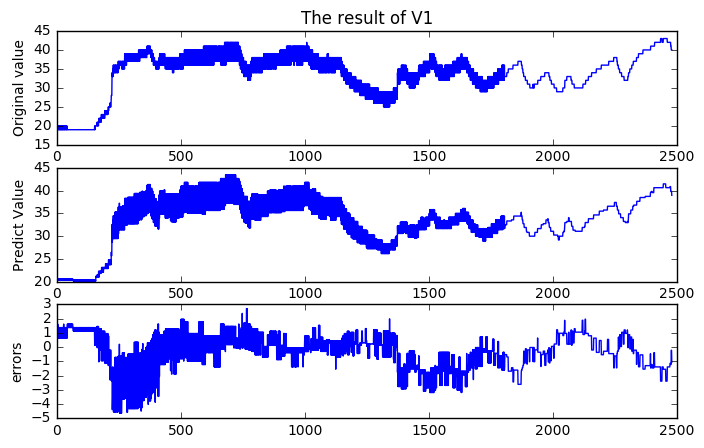

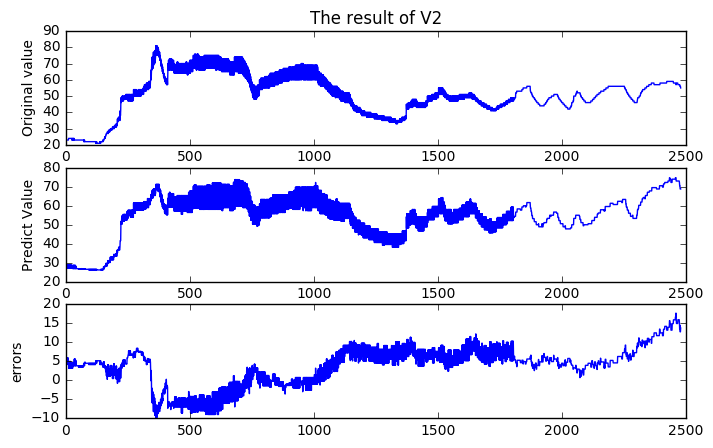

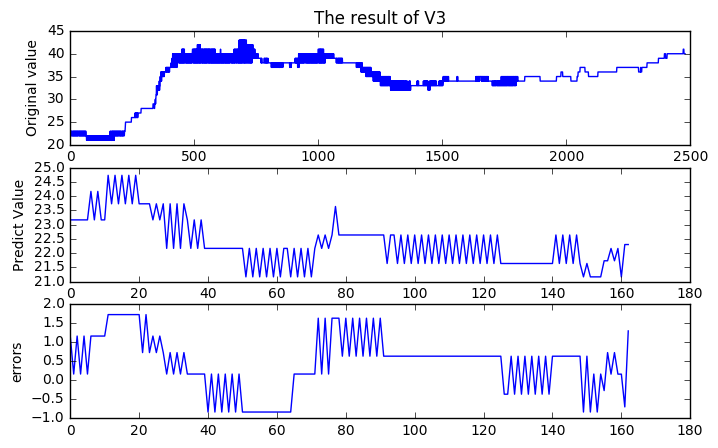

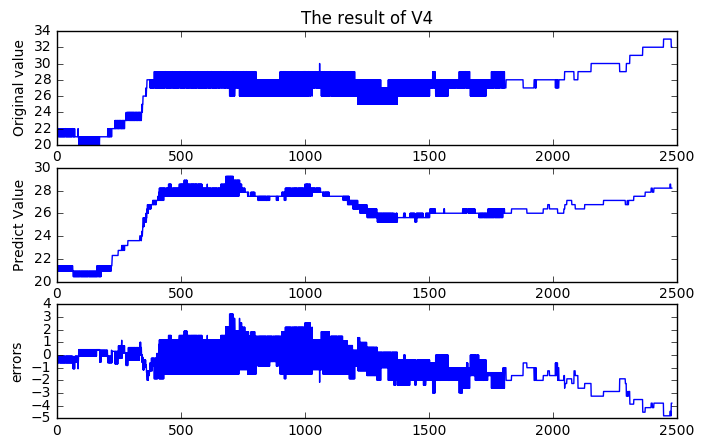

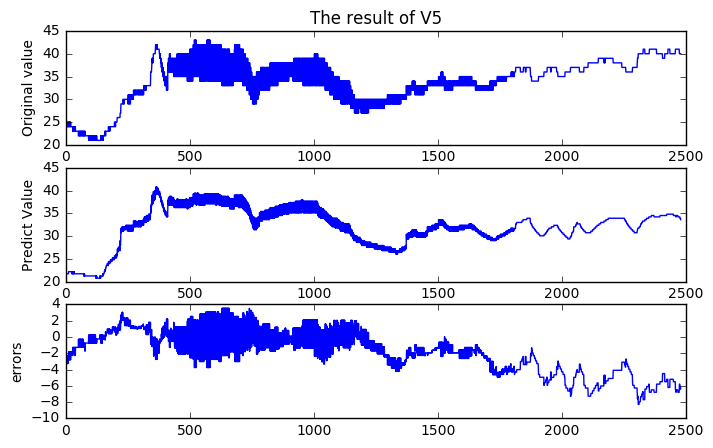

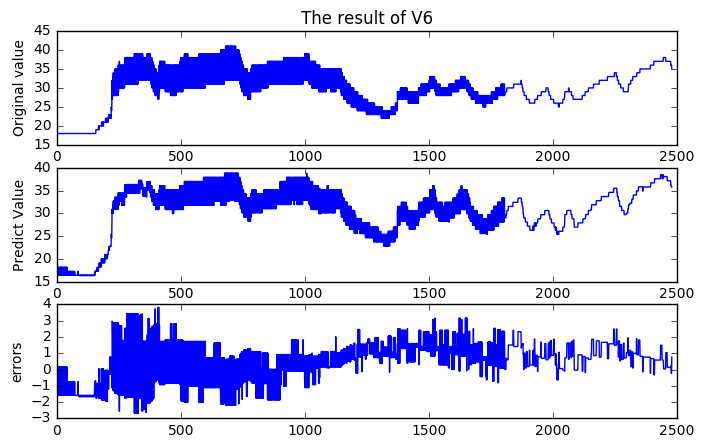

In [462]:
## plot for each signal with the last model

for i,result in zip(np.arange(0,6),gp_results):
    coms,nrmses,rmses,models,models_bin = result
    cols = list(np.arange(0,6))
    del cols[i]
    y = data[:,i]
    X = data[:,cols]
    model = models_bin[0] # the last model
    yp = model(*X.T)
    print(simplify_this(models[0]))
    f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,5))

    ax1.set_title('The result of V%d'%(i+1)) 
    ax1.plot(y)
    ax1.set_ylabel('Original value')
    ax2.plot(yp)
    ax2.set_ylabel('Predict Value')
    ax3.plot(yp-y)
    ax3.set_ylabel('errors')

In [463]:
### Learn expression by deap, main 2
varnames = np.array(['V1','V2','V3','V4','V5','V6'])
gp_results = list()
for i in np.arange(0,6):
    print("********************processing %d********************"%i)
    cols = list(np.arange(0,6))
    del cols[i]
    result = run_gp_main2(data,i,varnames,cols = cols)
    gp_results.insert(i,result)
    print("*****************************************************")

********************processing 0********************
gen	evals	min                      	max        	diversity
0  	401  	[ 1.58152625  2.        ]	[ inf  21.]	377      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


1  	500  	[ 1.58152625  1.        ]	[ inf   7.]	459      
2  	500  	[ 1.58152625  1.        ]	[  2.49020728e+32   1.00000000e+01]	453      
3  	500  	[ 1.57794806  1.        ]	[  2.49020728e+32   1.10000000e+01]	449      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 1.57794806  1.        ]	[  2.49020728e+32   6.00000000e+00]	445      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


5  	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   6.00000000e+00]	433      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


6  	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   6.00000000e+00]	431      
7  	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   1.10000000e+01]	428      
8  	500  	[ 1.50399286  1.        ]	[  2.49020728e+32   1.30000000e+01]	419      
9  	500  	[ 1.50399286  1.        ]	[  2.49020728e+32   1.90000000e+01]	430      
10 	500  	[ 1.50399286  1.        ]	[  2.49020728e+32   2.00000000e+01]	438      
11 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   2.00000000e+01]	433      
12 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.80000000e+01]	433      
13 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   2.10000000e+01]	428      
14 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.70000000e+01]	422      
15 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.70000000e+01]	417      
16 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.70000000e+01]	409      
17 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.90000000e+01]	413      
18 	500  	[ 1.39

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


19 	500  	[ 1.39437009  1.        ]	[ inf   6.]                        	412      
20 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.10000000e+01]	408      
21 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.20000000e+01]	403      
22 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.60000000e+01]	397      
23 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.60000000e+01]	392      
24 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.60000000e+01]	388      
25 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.60000000e+01]	384      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


26 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   6.00000000e+00]	375      
27 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.10000000e+01]	372      
28 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.10000000e+01]	367      
29 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.20000000e+01]	369      
30 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.20000000e+01]	373      
31 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.20000000e+01]	377      
32 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.30000000e+01]	376      
33 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.90000000e+01]	377      
34 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.90000000e+01]	376      
35 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   2.10000000e+01]	376      
36 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   2.10000000e+01]	373      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


37 	500  	[ 1.34668992  1.        ]	[ inf  14.]                        	367      
38 	500  	[ 1.34668992  1.        ]	[ inf  14.]                        	371      
39 	500  	[ 1.34668992  1.        ]	[ inf   9.]                        	372      
40 	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   4.00000000e+00]	390      
41 	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   8.00000000e+00]	392      
42 	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   1.10000000e+01]	385      
43 	500  	[ 1.50700372  1.        ]	[  2.49020728e+32   1.30000000e+01]	384      
44 	500  	[ 1.49996988  1.        ]	[  2.49020728e+32   1.30000000e+01]	385      
45 	500  	[ 1.49996988  1.        ]	[  2.49020728e+32   1.30000000e+01]	395      
46 	500  	[ 1.49996988  1.        ]	[  2.49020728e+32   1.70000000e+01]	402      
47 	500  	[ 1.49996988  1.        ]	[  2.49020728e+32   1.70000000e+01]	399      
48 	500  	[ 1.49996988  1.        ]	[  2.49020728e+32   2.20000000e+01]	400      
49 	500  	[ 1.49

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


1  	500  	[ 6.16929258  1.        ]	[ inf  18.]	460      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


2  	500  	[ 6.16929258  1.        ]	[ inf   6.]	439      
3  	500  	[ 5.79916523  1.        ]	[ inf   8.]	431      
4  	500  	[ 6.16929258  1.        ]	[  5.51996625e+17   4.00000000e+00]	416      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


5  	500  	[ 6.16929258  1.        ]	[  5.51996625e+17   6.00000000e+00]	423      
6  	500  	[ 6.13096319  1.        ]	[  5.51996625e+17   1.00000000e+01]	440      
7  	500  	[ 6.13096319  1.        ]	[  5.51996625e+17   1.20000000e+01]	438      
8  	500  	[ 6.13096319  1.        ]	[  5.51996625e+17   1.20000000e+01]	434      
9  	500  	[ 5.96713752  1.        ]	[  1.82160036e+36   1.40000000e+01]	423      
10 	500  	[ 5.12953721  1.        ]	[ inf  17.]                        	415      
11 	500  	[ 5.12953721  1.        ]	[ inf   7.]                        	414      
12 	500  	[ 6.16929258  1.        ]	[  5.51996625e+17   4.00000000e+00]	404      
13 	500  	[ 6.16929258  1.        ]	[  5.51996625e+17   1.00000000e+01]	398      
14 	500  	[ 6.1135746  1.       ]  	[  5.51996625e+17   1.00000000e+01]	397      
15 	500  	[ 6.1135746  1.       ]  	[  5.51996625e+17   1.10000000e+01]	396      
16 	500  	[ 5.98083222  1.        ]	[  5.51996625e+17   1.10000000e+01]	404      
17 	500  	[ 5.98

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


18 	500  	[ 5.73500662  1.        ]	[  5.51996625e+17   6.00000000e+00]	405      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


19 	500  	[ 5.73500662  1.        ]	[  5.51996625e+17   8.00000000e+00]	395      
20 	500  	[ 5.73500662  1.        ]	[  5.51996625e+17   1.00000000e+01]	393      
21 	500  	[ 5.73500662  1.        ]	[  5.51996625e+17   1.20000000e+01]	390      
22 	500  	[ 5.73500662  1.        ]	[  5.51996625e+17   1.20000000e+01]	380      
23 	500  	[ 5.73500662  1.        ]	[  5.51996625e+17   1.20000000e+01]	371      
24 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   1.20000000e+01]	365      
25 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   1.40000000e+01]	356      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


26 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   8.00000000e+00]	351      
27 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   1.20000000e+01]	337      
28 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   1.20000000e+01]	329      
29 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   1.30000000e+01]	331      
30 	500  	[ 5.39722796  1.        ]	[  5.51996625e+17   1.30000000e+01]	332      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


31 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   8.00000000e+00]	326      
32 	500  	[ 5.47220152  1.        ]	[  5.51996625e+17   1.10000000e+01]	323      
33 	500  	[ 5.2582341  1.       ]  	[  5.51996625e+17   1.20000000e+01]	325      
34 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.20000000e+01]	321      
35 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.20000000e+01]	314      
36 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.20000000e+01]	317      
37 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.40000000e+01]	315      
38 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.80000000e+01]	317      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


39 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.30000000e+01]	313      
40 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.80000000e+01]	316      
41 	500  	[ 5.12953721  1.        ]	[  5.51996625e+17   1.80000000e+01]	321      
42 	500  	[ 4.98445515  1.        ]	[  5.51996625e+17   1.80000000e+01]	317      
43 	500  	[ 4.98445515  1.        ]	[  5.51996625e+17   1.80000000e+01]	313      
44 	500  	[ 4.95873352  1.        ]	[  5.51996625e+17   1.50000000e+01]	313      
45 	500  	[ 4.95873352  1.        ]	[  5.51996625e+17   1.50000000e+01]	316      
46 	500  	[ 4.95873352  1.        ]	[  5.51996625e+17   1.50000000e+01]	327      
47 	500  	[ 4.95873352  1.        ]	[  5.51996625e+17   1.60000000e+01]	324      
48 	500  	[ 4.95873352  1.        ]	[  5.51996625e+17   2.10000000e+01]	324      
49 	500  	[ 4.95873352  1.        ]	[  5.51996625e+17   2.10000000e+01]	329      
*****************************************************
********************processing 2************

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


1  	500  	[ 3.23436923  1.        ]	[ inf   7.]	456      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


2  	500  	[ 3.23436923  1.        ]	[  2.49020728e+32   7.00000000e+00]	457      
3  	500  	[ 1.7551727  1.       ]  	[  4.30427158e+145   1.00000000e+001]	450      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 3.1752694  1.       ]  	[ inf   5.]                          	430      
5  	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   4.00000000e+00]  	431      
6  	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   1.00000000e+01]  	422      
7  	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   1.20000000e+01]  	437      
8  	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   1.20000000e+01]  	434      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 3.1752694  1.       ]  	[ inf   9.]                          	425      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


10 	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   4.00000000e+00]  	417      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


11 	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   7.00000000e+00]  	425      
12 	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   1.20000000e+01]  	422      
13 	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   1.20000000e+01]  	420      
14 	500  	[ 3.1752694  1.       ]  	[  2.49020728e+32   5.00000000e+00]  	409      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


15 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   6.00000000e+00]  	406      
16 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.10000000e+01]  	396      
17 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.30000000e+01]  	404      
18 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   2.00000000e+01]  	408      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


19 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	404      
20 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	409      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


21 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   7.00000000e+00]  	400      
22 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.20000000e+01]  	398      
23 	500  	[ 2.59728245  1.        ]	[  2.49020728e+32   1.30000000e+01]  	399      
24 	500  	[ 1.33165482  1.        ]	[  2.49020728e+32   1.30000000e+01]  	400      
25 	500  	[ 1.33165482  1.        ]	[  2.49020728e+32   1.30000000e+01]  	397      
26 	500  	[ 1.33165482  1.        ]	[  2.49020728e+32   1.30000000e+01]  	393      
27 	500  	[ 1.33165482  1.        ]	[  2.49020728e+32   1.40000000e+01]  	392      
28 	500  	[ 1.33165482  1.        ]	[ inf  13.]                          	407      
29 	500  	[ 1.33165482  1.        ]	[ inf  13.]                          	398      
30 	500  	[ 1.33165482  1.        ]	[ inf  13.]                          	387      
31 	500  	[ 2.91480375  1.        ]	[  3.88297720e+34   4.00000000e+00]  	382      
32 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	38

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


33 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   6.00000000e+00]  	389      
34 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	384      
35 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	393      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


36 	500  	[ 1.76076687  1.        ]	[ inf  13.]                          	387      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


37 	500  	[ 2.91480375  1.        ]	[ inf   5.]                          	374      
38 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   4.00000000e+00]  	373      
39 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	375      
40 	500  	[ 2.91480375  1.        ]	[  2.49020728e+32   1.00000000e+01]  	375      
41 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   6.00000000e+00]  	372      
42 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   1.00000000e+01]  	376      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


43 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   9.00000000e+00]  	380      
44 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   1.10000000e+01]  	382      
45 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   1.20000000e+01]  	384      
46 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   1.50000000e+01]  	391      
47 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   1.50000000e+01]  	390      
48 	500  	[ 1.76076687  1.        ]	[  2.49020728e+32   1.50000000e+01]  	393      
49 	500  	[ 1.71905766  1.        ]	[  2.49020728e+32   1.50000000e+01]  	391      
*****************************************************
********************processing 3********************
gen	evals	min                      	max        	diversity
0  	401  	[ 2.46426967  2.        ]	[ inf  21.]	376      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


1  	500  	[ 1.54094673  1.        ]	[ inf  17.]	458      
2  	500  	[ 1.54094673  1.        ]	[ inf  16.]	441      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


3  	500  	[ 1.54094673  1.        ]	[ inf  17.]	434      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 1.84982224  1.        ]	[  2.49020728e+32   4.00000000e+00]	433      
5  	500  	[ 1.84982224  1.        ]	[  2.49020728e+32   1.00000000e+01]	444      
6  	500  	[ 1.84982224  1.        ]	[  2.49020728e+32   1.20000000e+01]	439      
7  	500  	[ 1.84982224  1.        ]	[  2.49020728e+32   1.10000000e+01]	445      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


8  	500  	[ 1.33166168  1.        ]	[ inf  13.]                        	428      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 1.84982224  1.        ]	[  2.49020728e+32   4.00000000e+00]	414      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


10 	500  	[ 1.84982224  1.        ]	[  2.49020728e+32   4.00000000e+00]	410      
11 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.00000000e+01]	417      
12 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.00000000e+01]	419      
13 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   6.00000000e+00]	413      
14 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.10000000e+01]	413      
15 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.10000000e+01]	415      
16 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.40000000e+01]	417      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


17 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   6.00000000e+00]	414      
18 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.00000000e+01]	414      
19 	500  	[ 1.33511994  1.        ]	[  2.49020728e+32   1.20000000e+01]	418      
20 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.30000000e+01]	435      
21 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.30000000e+01]	434      
22 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.60000000e+01]	436      
23 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.60000000e+01]	433      
24 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.60000000e+01]	435      
25 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.80000000e+01]	432      
26 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.80000000e+01]	435      
27 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   2.00000000e+01]	434      
28 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   2.00000000e+01]	435      
29 	500  	[ 1.20

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


30 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.10000000e+01]	427      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


31 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.20000000e+01]	422      
32 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.40000000e+01]	416      
33 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.50000000e+01]	407      
34 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.50000000e+01]	405      
35 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.50000000e+01]	406      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


36 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   8.00000000e+00]	402      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


37 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   7.00000000e+00]	393      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


38 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   8.00000000e+00]	388      
39 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   9.00000000e+00]	383      
40 	500  	[ 1.20558757  1.        ]	[  2.49020728e+32   1.10000000e+01]	378      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


41 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   9.00000000e+00]	377      
42 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.20000000e+01]	371      
43 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.20000000e+01]	364      
44 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.20000000e+01]	364      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


45 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   8.00000000e+00]	359      
46 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.20000000e+01]	356      
47 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.20000000e+01]	352      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


48 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.10000000e+01]	351      
49 	500  	[ 0.4743607  1.       ]  	[  2.49020728e+32   1.10000000e+01]	344      
*****************************************************
********************processing 4********************
gen	evals	min                      	max        	diversity
0  	401  	[ 3.08962455  2.        ]	[ inf  21.]	377      
1  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   1.80000000e+01]	457      
2  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   1.80000000e+01]	467      
3  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   2.00000000e+01]	474      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   1.00000000e+01]	465      
5  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   1.20000000e+01]	471      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


6  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   9.00000000e+00]	465      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


7  	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   6.00000000e+00]	443      
8  	500  	[ 2.08652258  1.        ]	[  2.49020728e+32   1.30000000e+01]	432      
9  	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   1.00000000e+01]	430      
10 	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   1.10000000e+01]	435      
11 	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   1.20000000e+01]	433      
12 	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   1.20000000e+01]	427      
13 	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   7.00000000e+00]	415      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


14 	500  	[ 1.974537  1.      ]    	[  2.49020728e+32   7.00000000e+00]	418      
15 	500  	[ 1.974537  1.      ]    	[  2.49020728e+32   1.30000000e+01]	412      
16 	500  	[ 1.974537  1.      ]    	[  2.49020728e+32   1.40000000e+01]	404      
17 	500  	[ 1.93169558  1.        ]	[  2.49020728e+32   1.40000000e+01]	396      
18 	500  	[ 1.23235979  1.        ]	[  2.49020728e+32   1.40000000e+01]	388      
19 	500  	[ 1.23235979  1.        ]	[  2.49020728e+32   1.60000000e+01]	391      
20 	500  	[ 1.23235979  1.        ]	[  2.49020728e+32   1.80000000e+01]	397      
21 	500  	[ 1.23235979  1.        ]	[  2.49020728e+32   1.90000000e+01]	391      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


22 	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   6.00000000e+00]	382      
23 	500  	[ 2.06187345  1.        ]	[  2.49020728e+32   9.00000000e+00]	370      
24 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.00000000e+01]	368      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


25 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   7.00000000e+00]	364      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


26 	500  	[ 1.73826778  1.        ]	[ inf  10.]                        	375      
27 	500  	[ 1.73826778  1.        ]	[ inf  10.]                        	385      
28 	500  	[ 2.14146888  1.        ]	[  2.49020728e+32   4.00000000e+00]	388      
29 	500  	[ 2.07743792  1.        ]	[  2.49020728e+32   1.10000000e+01]	388      
30 	500  	[ 2.07743792  1.        ]	[  2.49020728e+32   1.30000000e+01]	386      
31 	500  	[ 2.07743792  1.        ]	[  2.49020728e+32   1.30000000e+01]	381      
32 	500  	[ 2.07743792  1.        ]	[  2.49020728e+32   8.00000000e+00]	384      
33 	500  	[ 1.93871962  1.        ]	[  2.49020728e+32   1.30000000e+01]	389      
34 	500  	[ 2.14146888  1.        ]	[ inf   5.]                        	377      
35 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.00000000e+01]	377      
36 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.00000000e+01]	374      
37 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.40000000e+01]	380      
38 	500  	[ 1.73

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


40 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   6.00000000e+00]	385      
41 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.00000000e+01]	380      
42 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.20000000e+01]	378      
43 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.30000000e+01]	376      
44 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.50000000e+01]	366      
45 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.60000000e+01]	366      
46 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.60000000e+01]	364      
47 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   1.60000000e+01]	375      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


48 	500  	[ 1.73826778  1.        ]	[  2.49020728e+32   6.00000000e+00]	364      
49 	500  	[ 1.73826778  1.        ]	[ inf   8.]                        	382      
*****************************************************
********************processing 5********************
gen	evals	min                    	max        	diversity
0  	401  	[ 1.4871764  2.       ]	[ inf  21.]	377      
1  	500  	[ 1.4871764  1.       ]	[ inf  17.]	455      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


2  	500  	[ 1.4871764  1.       ]	[ inf   5.]	447      
3  	500  	[ 1.4871764  1.       ]	[  2.49020728e+32   1.10000000e+01]	441      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


4  	500  	[ 1.48403344  1.        ]	[  2.49020728e+32   5.00000000e+00]	432      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


5  	500  	[ 1.48403344  1.        ]	[ inf   7.]                        	429      
6  	500  	[ 1.4871764  1.       ]  	[  2.49020728e+32   4.00000000e+00]	419      
7  	500  	[ 1.4871764  1.       ]  	[  2.49020728e+32   1.10000000e+01]	431      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


8  	500  	[ 1.4871764  1.       ]  	[  2.49020728e+32   4.00000000e+00]	425      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


9  	500  	[ 1.4871764  1.       ]  	[  2.49020728e+32   4.00000000e+00]	423      
10 	500  	[ 1.4871764  1.       ]  	[  2.49020728e+32   5.00000000e+00]	422      


/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


11 	500  	[ 1.4871764  1.       ]  	[  2.49020728e+32   5.00000000e+00]	425      
12 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.00000000e+01]	424      
13 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.00000000e+01]	418      
14 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.10000000e+01]	417      
15 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.10000000e+01]	423      
16 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.30000000e+01]	425      
17 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.30000000e+01]	444      
18 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.30000000e+01]	444      
19 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.40000000e+01]	439      
20 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.50000000e+01]	433      
21 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.60000000e+01]	437      
22 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.50000000e+01]	434      
23 	500  	[ 1.48

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


24 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   9.00000000e+00]	431      
25 	500  	[ 1.48517262  1.        ]	[  2.49020728e+32   1.30000000e+01]	428      
26 	500  	[ 1.47773784  1.        ]	[  2.49020728e+32   1.40000000e+01]	426      
27 	500  	[ 1.47773784  1.        ]	[  2.49020728e+32   2.00000000e+01]	432      
28 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.40000000e+01]	429      
29 	500  	[ 1.39437009  1.        ]	[  2.49020728e+32   1.80000000e+01]	426      
30 	500  	[ 1.37493588  1.        ]	[  2.49020728e+32   1.80000000e+01]	424      
31 	500  	[ 1.37493588  1.        ]	[  2.49020728e+32   2.00000000e+01]	423      
32 	500  	[ 1.37493588  1.        ]	[  2.49020728e+32   2.10000000e+01]	427      
33 	500  	[ 1.37493588  1.        ]	[  2.49020728e+32   2.10000000e+01]	427      
34 	500  	[ 1.37493588  1.        ]	[  2.49020728e+32   2.10000000e+01]	428      
35 	500  	[ 1.37286843  1.        ]	[  2.49020728e+32   2.10000000e+01]	433      
36 	500  	[ 1.37

/home/happyling/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


48 	500  	[ 1.37286843  1.        ]	[ inf  13.]                        	387      
49 	500  	[ 1.37286843  1.        ]	[ inf  13.]                        	389      
*****************************************************


************************* V1 *********************
0.184*V4 + V6 - 1.099
V6 + log(V2)
V6 + log(V2)
V6 + 3.8919999999999999
V6 + 3.8919999999999999
V6 + 3.8919999999999999
V5
---------------------------------------------------------------------------------
complexity         nrmse_test         nrmse_train         rmse_test         rmse_train
7.000000         0.062980         0.062499         1.511530         1.499970
4.000000         0.063454         0.062792         1.522900         1.507004
4.000000         0.063454         0.062792         1.522900         1.507004
3.000000         0.064846         0.065897         1.556311         1.581526
3.000000         0.064846         0.065897         1.556311         1.581526
3.000000         0.064846         0.065897         1.556311         1.581526
1.000000         0.130561         0.132297         3.133456         3.175130
*********************************************************************
************************* V2 *******************

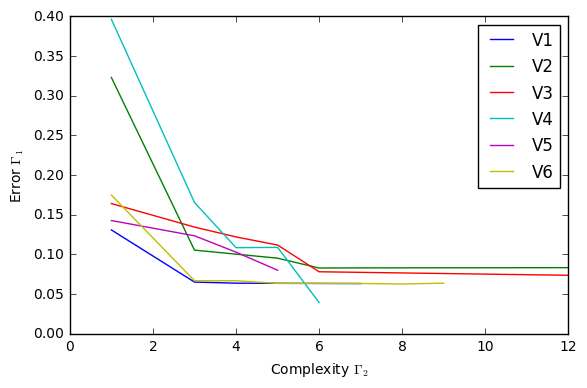

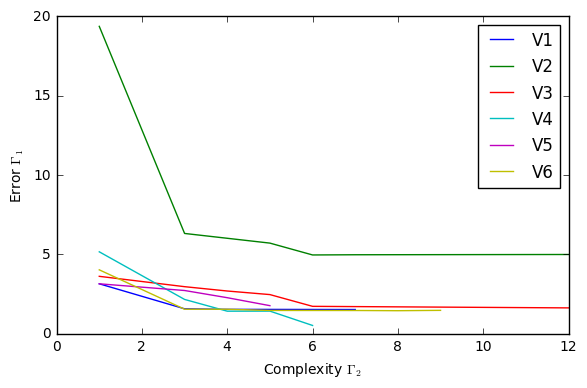

In [464]:
result_summary_gp(gp_results,varnames)

V6 + log(V2)
1.3680000000000001*V3 - 1.3680000000000001*V4 + 1.3680000000000001*V6
V5 - cos(exp(square(V5)))
0.505*V5 + 10.0
0.13600000000000001*V2 + V4
V1 - 3.9300000000000002*log(V3) + 10.0


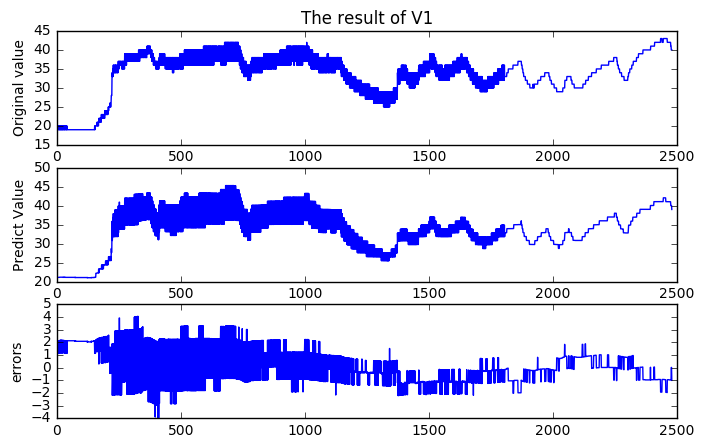

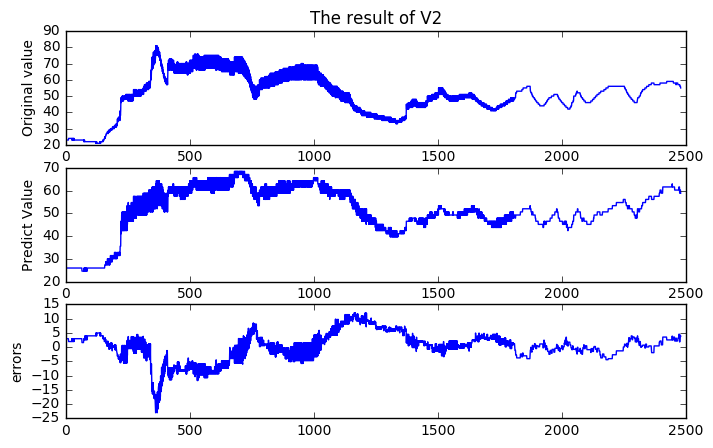

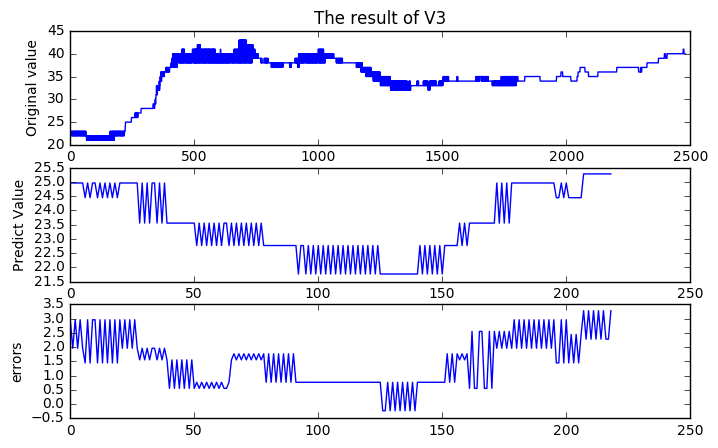

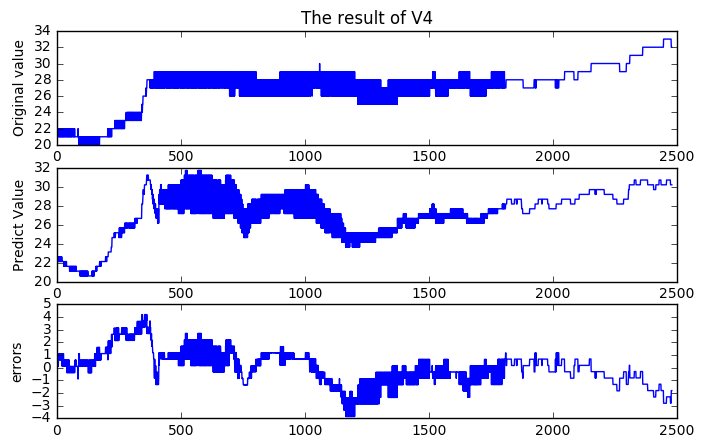

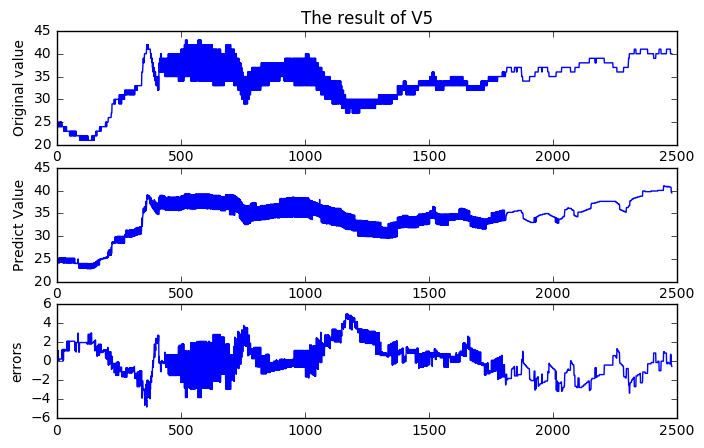

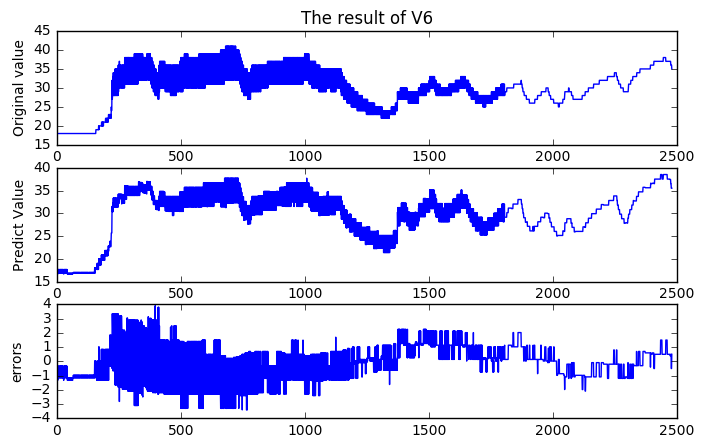

In [465]:
## plot for each signal with the last model

for i,result in zip(np.arange(0,6),gp_results):
    coms,nrmses,rmses,models,models_bin = result
    cols = list(np.arange(0,6))
    del cols[i]
    y = data[:,i]
    X = data[:,cols]
    model = models_bin[1] # the last model
    yp = model(*X.T)
    print(simplify_this(models[1]))
    f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,5))

    ax1.set_title('The result of V%d'%(i+1)) 
    ax1.plot(y)
    ax1.set_ylabel('Original value')
    ax2.plot(yp)
    ax2.set_ylabel('Predict Value')
    ax3.plot(yp-y
    ax3.set_ylabel('errors')